# Geely Auto Assignment

In [1]:
"""
###################################################################################################################################
##  
##  Program Name        : GeelyAuto Assignment
##
##  Description         : To understand the factors on which the pricing of cars depends.
##                        To understand Which variables are significant in predicting the price of a car
##                        How well those variables describe the price of a car  
##
##  Author              : Sunil Yousef
##  
###################################################################################################################################
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib import gridspec

## Data Sourcing

#### Load and read CarPrice_Assignment.csv to CarPricedf data frame using ISO-8859-1 encoding

In [2]:
master_frame = pd.read_csv("CarPrice_Assignment.csv", sep=',', encoding = "ISO-8859-1", )
master_frame.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Get the information of loaded dataset.

In [3]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### Get the description of loaded dataset.

In [4]:
master_frame.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Get the columns names of loaded dataset.

In [5]:
master_frame.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Assumptions and approach to solve problem

* The 5 assumptions that are made for linear regression are Linearity, Outliers, Autocorrelation, Heteroscedasticity and Multicollinearity.
* EDA will be used to understand, validate and correct data based on the 3 assumptions Linearity, Outliers and Multicollinearity, by removing redundent or insignificant data before starting with multiple linear regression.
* Approach to solve the problem
    * Data cleaning
        * if any columns has more than 95% null values drop them
        * Car_ID column has only unique vlaues so this will be removed
        * All float values will be rounded to 2 decimal places
        * Car name column wil be splitted to company name and model then spelling mistakes will be corrected
        * Fuelsystem mfi is another name of mpfi fuel system this will be corrected. ref http://www.bwdbrand.com/en/products/fuel-injection-fuel-system/
    * EDA Analysis - to undrestand the data and remove outliers and in significant data
        * Gather data for Meta Data Description
        * Univariate analysis - For screening data and acess possible violations like outliers etc...
        * Segmented univariate analysis to check doamin level or Data multicollinearity
        * Bivariate analysis - anlyse the Linearity of each variable with price and remove those which are not linear.
    * Data Preperation
        * Prepare Data by converting catagorical variables to dummy variables.
    * Derive new variables
        * averge mileage
    * Rescale the Features using normalisation
    * Check VIF
        * check VIF of independent variables to eliminate any high correlated variables whose rsquare is 1.
    * Create test and training data sets
    * Then perform the RFE with output number of variables equal to 21 so that we can remove significant variables 
    * After RFE check VIF and remove varaibles with p value greater than 0.05 and high VIF
    * Repeat the above process until we reach very low VIF of less than 2 and p values less than 0.05.
    * Heteroscedasticity 
    * Predict data
    * Check for MSE, RMSE, R-squared and Residual plot for error terms and Auto correlation.

## User Defined Functions

##### Function for calculating vif value

In [6]:
# UDF for calculating vif value
def statsmodels_vif_cal(input_data, dependent_col):
    X = input_data.drop([dependent_col], axis=1)
    # For each X, calculate VIF and save in dataframe
    vif = pd.DataFrame(columns = ['Var', 'Vif'])
    vif["Var"] = X.columns
    vif["Vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False).round(2)

##### Function to create dummy variables and drop the variable from master frame

In [7]:
def create_dummy_variable(variable, df, dummy_var_to_Drop):
    try:
        print(df[variable].unique())
        
        # Creating dummy variable for variable
        tempvar = pd.get_dummies(df[variable])
        
        # Creating unique names for dummy var columns
        tempvar.rename(lambda x:  variable + '_'+  str(x), axis='columns', inplace=True)
        print(tempvar.head(5))
        
        #Adding the results to the master dataframe
        df = pd.concat([df, tempvar],axis=1)
        
        # Dropping the variables
        if dummy_var_to_Drop is not None:
            print('dropping ', dummy_var_to_Drop)
            df.drop([variable + '_'+  str(dummy_var_to_Drop)], axis=1, inplace=True)
        
        print('dropping ', variable)
        df.drop([variable], axis=1, inplace=True)
        
        print('droped both variables')
    except:
        print('\tColumn already converted to dummy variables and dropped...')
    return df

##### Funciton to draw a scatter plot

In [8]:
def draw_scatter_plot(df, X, Y, xlabel, ylabel, width=5, height=5, xLblRotation=0, title=None, colors=(0,0,0), alpha=0.5):
    # Restore the rc params from Matplotlib’s internal defaults.
    plt.rcdefaults() 
    
    # Set figure size
    plt.figure(figsize=(width, height))
    area = np.pi*3
    plt.scatter(x=X, y=Y, data=df, s=area, c=colors, alpha=alpha)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=xLblRotation)
    plt.title(title)
    plt.show()

#### Function to print values on top of the bars in a plot

In [9]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

#### Function to show a bar chart

In [10]:
def draw_bar_chart(df, x, y, width, height, title='', xlabel='', ylabel='', xLblRotation=0, 
                   legend=None, message='', showBarVals=False):
    
    # Restore the rc params from Matplotlib’s internal defaults.
    plt.rcdefaults() 
    
    # Set figure size
    plt.figure(figsize=(width, height))
    
    # Plot bar chart of data frame 
    ax = sns.barplot(x=x, y=y, data=df)
    
    if showBarVals == True:
        show_values_on_bars(ax)
    
    if xlabel.strip():
        plt.xlabel(xlabel)
    
    if ylabel.strip():    
        plt.ylabel(ylabel)
    
    if legend is not None:
        plt.legend(legend)
    
    if title.strip():
        plt.title(title)
    
    plt.xticks(rotation=xLblRotation)
    
    plt.show()
    
    if message.strip():
        print(message)

#### Function to draw barchart subplot

In [11]:
def draw_bar_chart_subplot(df, x, y, title='', xlabel='', ylabel='', xLblRotation=0,
                           legend=None, message='', showBarVals=False, show=False,
                           subplot_arg1=2, subplot_arg2=2, subplot_arg3=1):

    plt.subplot(subplot_arg1, subplot_arg2, subplot_arg3)
    
    # Plot bar chart of data frame 
    ax = sns.barplot(x=x, y=y, data=df)
    
    if showBarVals == True:
        show_values_on_bars(ax)
    
    if xlabel.strip():
        plt.xlabel(xlabel)
    
    if ylabel.strip():    
        plt.ylabel(ylabel)
    
    if legend is not None:
        plt.legend(legend)
    
    if title.strip():
        plt.title(title)
    
    plt.xticks(rotation=xLblRotation)
    
    if show == True:
        plt.show()
    
    if message.strip():
        print(message)

#### Function to draw barchart subplot with grid spec

In [12]:
def draw_bar_chart_subplot_gridspec(df, x, y, gridspec, title='', xlabel='', ylabel='', xLblRotation=0,
                           legend=None, message='', showBarVals=False, show=False):

    plt.subplot(gridspec)
    
    # Plot bar chart of data frame 
    ax = sns.barplot(x=x, y=y, data=df)
    
    if showBarVals == True:
        show_values_on_bars(ax)
    
    if xlabel.strip():
        plt.xlabel(xlabel)
    
    if ylabel.strip():    
        plt.ylabel(ylabel)
    
    if legend is not None:
        plt.legend(legend)
    
    if title.strip():
        plt.title(title)
    
    plt.xticks(rotation=xLblRotation)
    
    if show == True:
        plt.show()
    
    if message.strip():
        print(message)

## Data Cleaning

#### Drop car_ID column as we dont need this for linear regression

In [13]:
try:
    print('Dropping car_ID column', '...')
    master_frame.drop('car_ID', axis=1, inplace=True)
except:
    print('\tColumn already dropped...')

Dropping car_ID column ...


#### Check if any columns has null values

In [14]:
# Get the percentage of null values for each columns
na_percent = round(master_frame.isnull().sum() / len(master_frame.index) * 100, 2)
if any(na_percent[na_percent > 0]):
    print("\nColumns which have null values and there percentage is,\n", na_percent[na_percent > 0])
else:
    print("\nNone of the Columns have null values.\n", na_percent[na_percent > 0])


None of the Columns have null values.
 Series([], dtype: float64)


#### Round to 2 decimal places

In [15]:
#  Round 'price' column values to 2 decimal places.
master_frame["price"] = round(master_frame["price"], 2)
print("After rounding to 2 decimal places...\n", master_frame["price"][0:2])

After rounding to 2 decimal places...
 0    13495.0
1    16500.0
Name: price, dtype: float64


#### Split the Carname to remove the model name.
There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'.
For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name.
You need to consider only company name as the independent variable for model building.

In [16]:
master_frame['CarName'] = master_frame['CarName'].str.strip()
master_frame[['CompanyName', 'Model']] = master_frame['CarName'].str.split(' ', n=1, expand=True)
master_frame.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,Model
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


##### Confirm that the company name is not accidently splitted into model name.

In [17]:
master_frame.Model.unique()

array(['giulia', 'stelvio', 'Quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop',
       'colt (sw)', 'coronet custom', 'dart custom',
       'coronet custom (sw)', 'civic', 'civic cvcc', 'accord cvcc',
       'accord lx', 'civic 1500 gl', 'accord', 'civic 1300', 'prelude',
       'civic (auto)', 'MU-X', 'D-Max', 'D-Max V-Cross', 'xj', 'xf', 'xk',
       'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626', 'glc', 'rx-7 gs',
       'glc 4', 'glc custom l', 'glc custom', 'electra 225 custom',
       'century luxus (sw)', 'century', 'skyhawk', 'opel isuzu deluxe',
       'skylark', 'century special', 'regal sport coupe (turbo)',
       'cougar', 'mirage', 'lancer', 'outlander', 'g4', 'mirage g4',
       'montero', 'pajero', 'versa', 'gt-r', 'rogue', 'latio', 'titan',
       'leaf', 'juke', 'note', 'clipper', '

#### Drop the model column and carname column as we dont need these columns for our analysis

In [18]:
# Remove the following Columns as we are considering only company names. 
print('Dropping the following list of columns as we are considering only company names')

column_list = ['CarName', 'Model']

for column in column_list:
    print('Dropping', column, '...')
    try:
        master_frame.drop(column, axis=1, inplace=True)
    except:
        print('\tColumn already dropped...')
        continue

Dropping the following list of columns as we are considering only company names
Dropping CarName ...
Dropping Model ...


#### Check the company names we got after splitting

In [19]:
master_frame.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Following company names are wrongly spelled or duplicated
* case mismatch for 'Nissan', 'nissan'
* 'alfa-romeo' is misspelled as 'alfa-romero'
* 'mazda' is misspelled as 'maxda' 
* 'porsche' is misspelled as 'porcshce'
* 'toyota' is misspelled as 'toyouta'
* 'vokswagen' and 'vw' instead of 'volkswagen'

#### Fixing the errors in company names

In [20]:
# Fixing case mismatch error of 'Nissan', 'nissan'
master_frame['CompanyName'] = master_frame['CompanyName'].str.upper()

# Fixing spelling error- 'alfa-romeo' is misspelled as 'alfa-romero'
master_frame['CompanyName'] = master_frame['CompanyName'].str.replace("ALFA-ROMERO", "ALFA-ROMEO")

# Fixing the spelling mistake of 'maxda' by replacing with correct spelling 'mazda'
master_frame['CompanyName'] = master_frame['CompanyName'].str.replace("MAXDA", "MAZDA")

# Fixing the spelling mistake of 'porcshce' by replacing with correct spelling 'porsche'
master_frame['CompanyName'] = master_frame['CompanyName'].str.replace("PORCSHCE", "PORSCHE")

# Fixing the spelling mistake of 'toyouta' by replacing with correct spelling 'toyota'
master_frame['CompanyName'] = master_frame['CompanyName'].str.replace("TOYOUTA", "TOYOTA")

# Replacing 'vokswagen' and 'vw' with correct spelling 'volkswagen'¶
master_frame['CompanyName'] = master_frame['CompanyName'].str.replace("VOKSWAGEN", "VOLKSWAGEN")
master_frame['CompanyName'] = master_frame['CompanyName'].str.replace("VW", "VOLKSWAGEN")

master_frame.CompanyName.unique()

array(['ALFA-ROMEO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAZDA', 'BUICK', 'MERCURY', 'MITSUBISHI',
       'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE', 'RENAULT', 'SAAB',
       'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

#### The fuel system mfi is another name of mpfi rename this to mpfi 

ref: http://www.bwdbrand.com/en/products/fuel-injection-fuel-system/

In [21]:
master_frame['fuelsystem'] = master_frame['fuelsystem'].str.replace("mfi", "mpfi")
master_frame.fuelsystem.unique()

array(['mpfi', '2bbl', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

#### Check the data after data cleaning

In [22]:
master_frame.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.00,ALFA-ROMEO
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.00,ALFA-ROMEO
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.00,ALFA-ROMEO
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.00,AUDI
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.00,AUDI
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.00,AUDI
6,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.00,AUDI
7,1,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.00,AUDI
8,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.00,AUDI
9,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.17,AUDI


## Exploratory Data Analysis
* To have better undersatnding of data before going deeper into it

#### Gather data for Meta Data Description

In [23]:
master_frame.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
symboling,205,NaN,NaN,NaN,0.834146,1.24531,-2,0,1,2,3
fueltype,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumber,205,2,four,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carbody,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheel,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,205,NaN,NaN,NaN,98.7566,6.02178,86.6,94.5,97,102.4,120.9
carlength,205,NaN,NaN,NaN,174.049,12.3373,141.1,166.3,173.2,183.1,208.1
carwidth,205,NaN,NaN,NaN,65.9078,2.1452,60.3,64.1,65.5,66.9,72.3


#### Analysis of symboling frequency

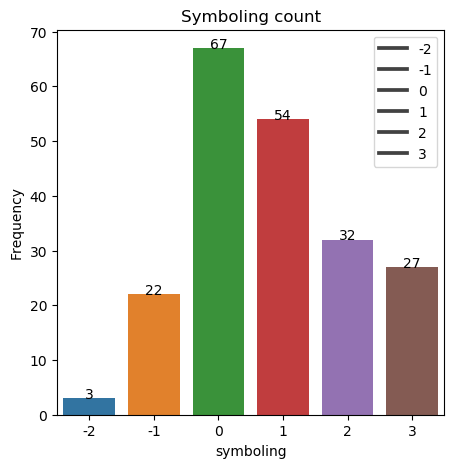

Inference: The symboling -2 has only 3 observations this shall be removed while deriving dummy variables.


{'symboling': '-2'}

In [24]:
#------------------------------------------------------------------
# The variable symboling is an Ordered Categorical variable.
#------------------------------------------------------------------

# Plot frequency bar chart of symboling column 
symboling_freq = master_frame.groupby(master_frame.symboling).size().reset_index(name='Frequency')
draw_bar_chart(symboling_freq, "symboling", "Frequency", 5, 5,
               'Symboling count',
               'symboling', 'Frequency', 
               0, symboling_freq['symboling'],
               'Inference: The symboling -2 has only 3 observations this shall be removed while deriving dummy variables.',
              True)

# Lets create a dictionary of columns to be removed while creating dummy variables so that it will be easy to get the list
col_to_remove_forDummy = {'symboling':'-2'}
col_to_remove_forDummy

#### Analysis of fueltype Frequency

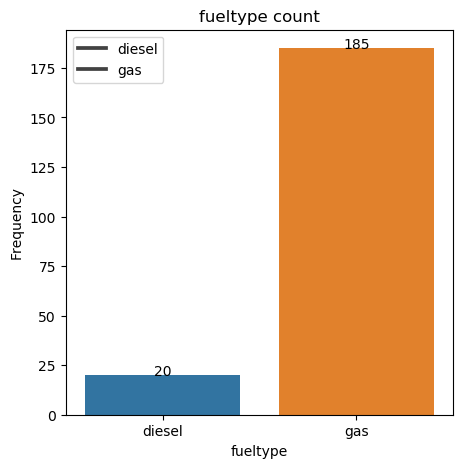

Inference: The fueltype gas is more preferred


{'symboling': '-2', 'fueltype': 'diesel'}

In [25]:
#------------------------------------------------------------------
# The variable fueltype is an unOrdered Categorical variable.
#------------------------------------------------------------------

# Plot frequency bar chart of fueltype column 
fueltype_freq = master_frame.groupby(master_frame.fueltype).size().reset_index(name='Frequency')
draw_bar_chart(fueltype_freq, "fueltype", "Frequency", 5, 5,
               'fueltype count',
               'fueltype', 'Frequency', 
               0, fueltype_freq['fueltype'],
               'Inference: The fueltype gas is more preferred',
              True)

# Any one of these columns can be removed while dummy variable creation
col_to_remove_forDummy['fueltype'] = 'diesel'
col_to_remove_forDummy

#### Analysis of aspiration Frequency

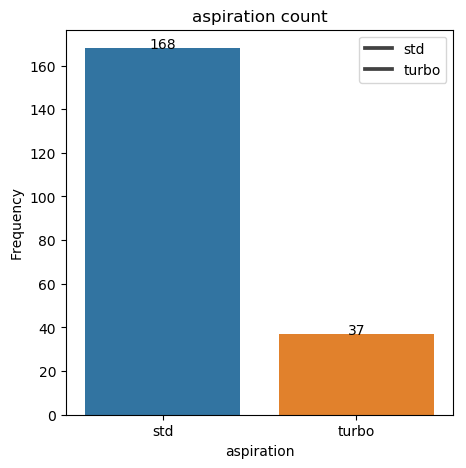

Inference: In the aspiration std is more preferred


{'symboling': '-2', 'fueltype': 'diesel', 'aspiration': 'turbo'}

In [26]:
#------------------------------------------------------------------
# The variable aspiration is an unOrdered Categorical variable.
#------------------------------------------------------------------

# Plot frequency bar chart of aspiration column 
columnName = 'aspiration'
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')
draw_bar_chart(freq, columnName, "Frequency", 5, 5,
               columnName + ' count',
               columnName, 'Frequency', 
               0, freq[columnName],
               'Inference: In the ' + columnName + ' std' + ' is more preferred',
               True)

# Any one of these columns can be removed while dummy variable creation
col_to_remove_forDummy[columnName] = 'turbo'
col_to_remove_forDummy

#### Analysis of ordered catagorical variable doornumber Frequency

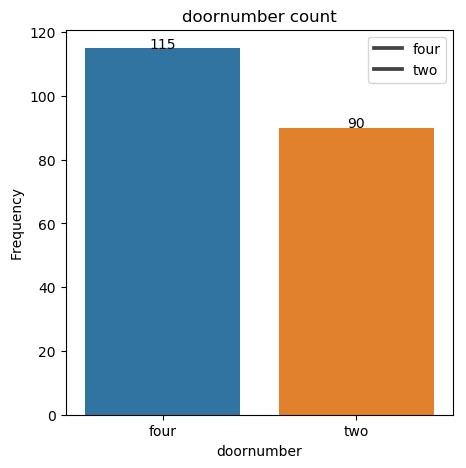

Inference: In the doornumber four is more preferred


{'symboling': '-2',
 'fueltype': 'diesel',
 'aspiration': 'turbo',
 'doornumber': 'two'}

In [27]:
# Plot frequency bar chart 
columnName = 'doornumber'
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')
draw_bar_chart(freq, columnName, "Frequency", 5, 5,
               columnName + ' count',
               columnName, 'Frequency', 
               0, freq[columnName],
               'Inference: In the ' + columnName + ' four' + ' is more preferred',
               True)

# Any one of these columns can be removed while dummy variable creation
col_to_remove_forDummy[columnName] = 'two'
col_to_remove_forDummy

#### Analysis of carbody Frequency

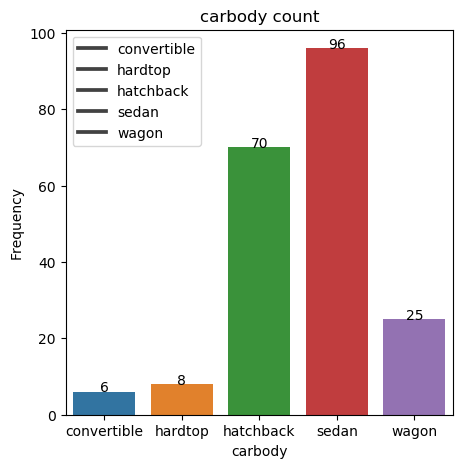

Inference: In the carbody sedan is more preferred


{'symboling': '-2',
 'fueltype': 'diesel',
 'aspiration': 'turbo',
 'doornumber': 'two',
 'carbody': 'convertible'}

In [28]:
# Plot frequency bar chart 
columnName = 'carbody'
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')
draw_bar_chart(freq, columnName, "Frequency", 5, 5,
               columnName + ' count',
               columnName, 'Frequency', 
               0, freq[columnName],
               'Inference: In the ' + columnName + ' sedan' + ' is more preferred',
               True)

# Any one of these columns can be removed while dummy variable creation
col_to_remove_forDummy[columnName] = 'convertible'
col_to_remove_forDummy

#### Analysis of drivewheel Frequency

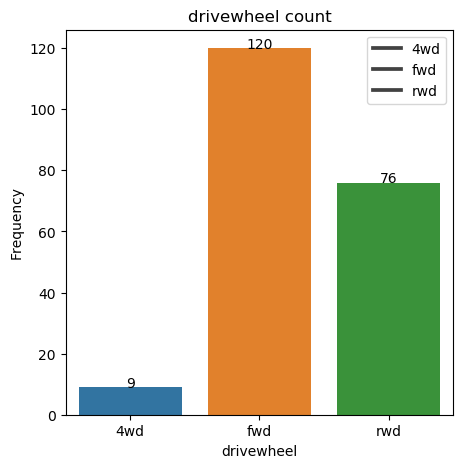

Inference: In the drivewheel fwd is more preferred


{'symboling': '-2',
 'fueltype': 'diesel',
 'aspiration': 'turbo',
 'doornumber': 'two',
 'carbody': 'convertible',
 'drivewheel': '4wd'}

In [29]:
# Plot frequency bar chart  
columnName = 'drivewheel'
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')
draw_bar_chart(freq, columnName, "Frequency", 5, 5,
               columnName + ' count',
               columnName, 'Frequency', 
               0, freq[columnName],
               'Inference: In the ' + columnName + ' fwd' + ' is more preferred',
               True)

# Any one of these columns can be removed while dummy variable creation
col_to_remove_forDummy[columnName] = '4wd'
col_to_remove_forDummy

#### Analysis of enginelocation Frequency

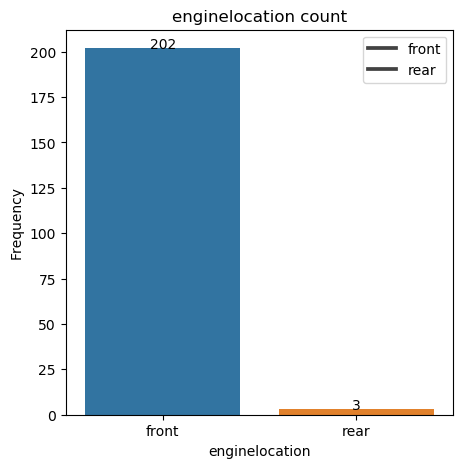

Inference: In the enginelocation frontis more preferred


{'symboling': '-2',
 'fueltype': 'diesel',
 'aspiration': 'turbo',
 'doornumber': 'two',
 'carbody': 'convertible',
 'drivewheel': '4wd',
 'enginelocation': 'rear'}

In [30]:
# Plot frequency bar chart  
columnName = 'enginelocation'
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')
draw_bar_chart(freq, columnName, "Frequency", 5, 5,
               columnName + ' count',
               columnName, 'Frequency', 
               0, freq[columnName],
               'Inference: In the ' + columnName + ' front' + 'is more preferred',
               True)

# Any one of these columns can be removed while dummy variable creation
col_to_remove_forDummy[columnName] = 'rear'
col_to_remove_forDummy

#### Analysis of enginetype Frequency

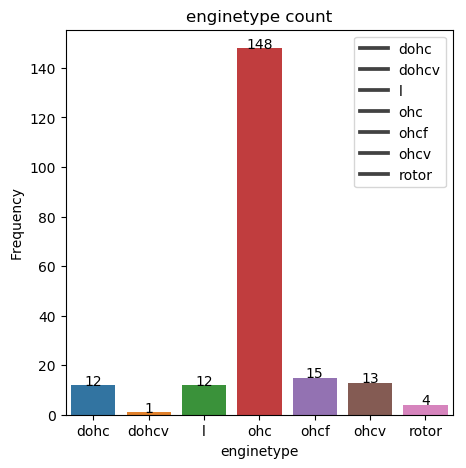

Inference: In the enginetype ohc is more preferred


{'symboling': '-2',
 'fueltype': 'diesel',
 'aspiration': 'turbo',
 'doornumber': 'two',
 'carbody': 'convertible',
 'drivewheel': '4wd',
 'enginelocation': 'rear',
 'enginetype': 'dohcv'}

In [31]:
# Plot frequency bar chart  
columnName = 'enginetype'
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')
draw_bar_chart(freq, columnName, "Frequency", 5, 5,
               columnName + ' count',
               columnName, 'Frequency', 
               0, freq[columnName],
               'Inference: In the ' + columnName + ' ohc' + ' is more preferred',
               True)

# Any one of these columns can be removed while dummy variable creation
col_to_remove_forDummy[columnName] = 'dohcv'
col_to_remove_forDummy

#### Analysis of cylindernumber Frequency

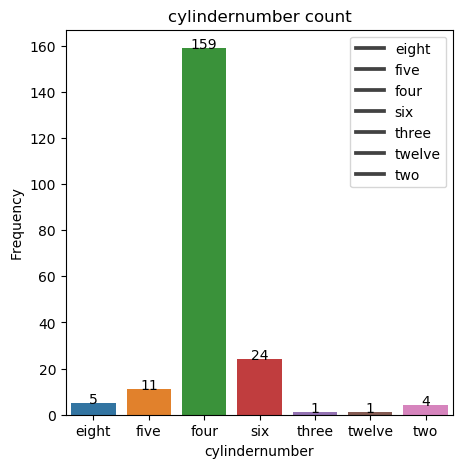

Inference: In the cylindernumber four is more preferred


{'symboling': '-2',
 'fueltype': 'diesel',
 'aspiration': 'turbo',
 'doornumber': 'two',
 'carbody': 'convertible',
 'drivewheel': '4wd',
 'enginelocation': 'rear',
 'enginetype': 'dohcv',
 'cylindernumber': 'three'}

In [32]:
# Plot frequency bar chart  
columnName = 'cylindernumber'
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')
draw_bar_chart(freq, columnName, "Frequency", 5, 5,
               columnName + ' count',
               columnName, 'Frequency', 
               0, freq[columnName],
               'Inference: In the ' + columnName + ' four' + ' is more preferred',
               True)

# cylinder number three or twelve can be removed while dummy variable creation
col_to_remove_forDummy[columnName] = 'three'
col_to_remove_forDummy

#### Analysis of fuelsystem Frequency

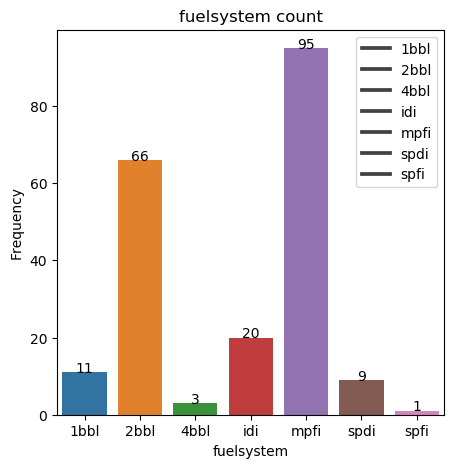

Inference: In the fuelsystem mpfi is more preferred


{'symboling': '-2',
 'fueltype': 'diesel',
 'aspiration': 'turbo',
 'doornumber': 'two',
 'carbody': 'convertible',
 'drivewheel': '4wd',
 'enginelocation': 'rear',
 'enginetype': 'dohcv',
 'cylindernumber': 'three',
 'fuelsystem': 'spfi'}

In [33]:
# Plot frequency bar chart  
columnName = 'fuelsystem'
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')
draw_bar_chart(freq, columnName, "Frequency", 5, 5,
               columnName + ' count',
               columnName, 'Frequency', 
               0, freq[columnName],
               'Inference: In the ' + columnName + ' mpfi' + ' is more preferred',
               True)

# fuelsystem mfi or spfi can be removed while dummy variable creation
col_to_remove_forDummy[columnName] = 'spfi'
col_to_remove_forDummy

#### Analysis of wheelbase Frequency

Mean of wheelbase =  98.76
Median of wheelbase =  97.0
Mode of wheelbase =  0    94.5
dtype: float64


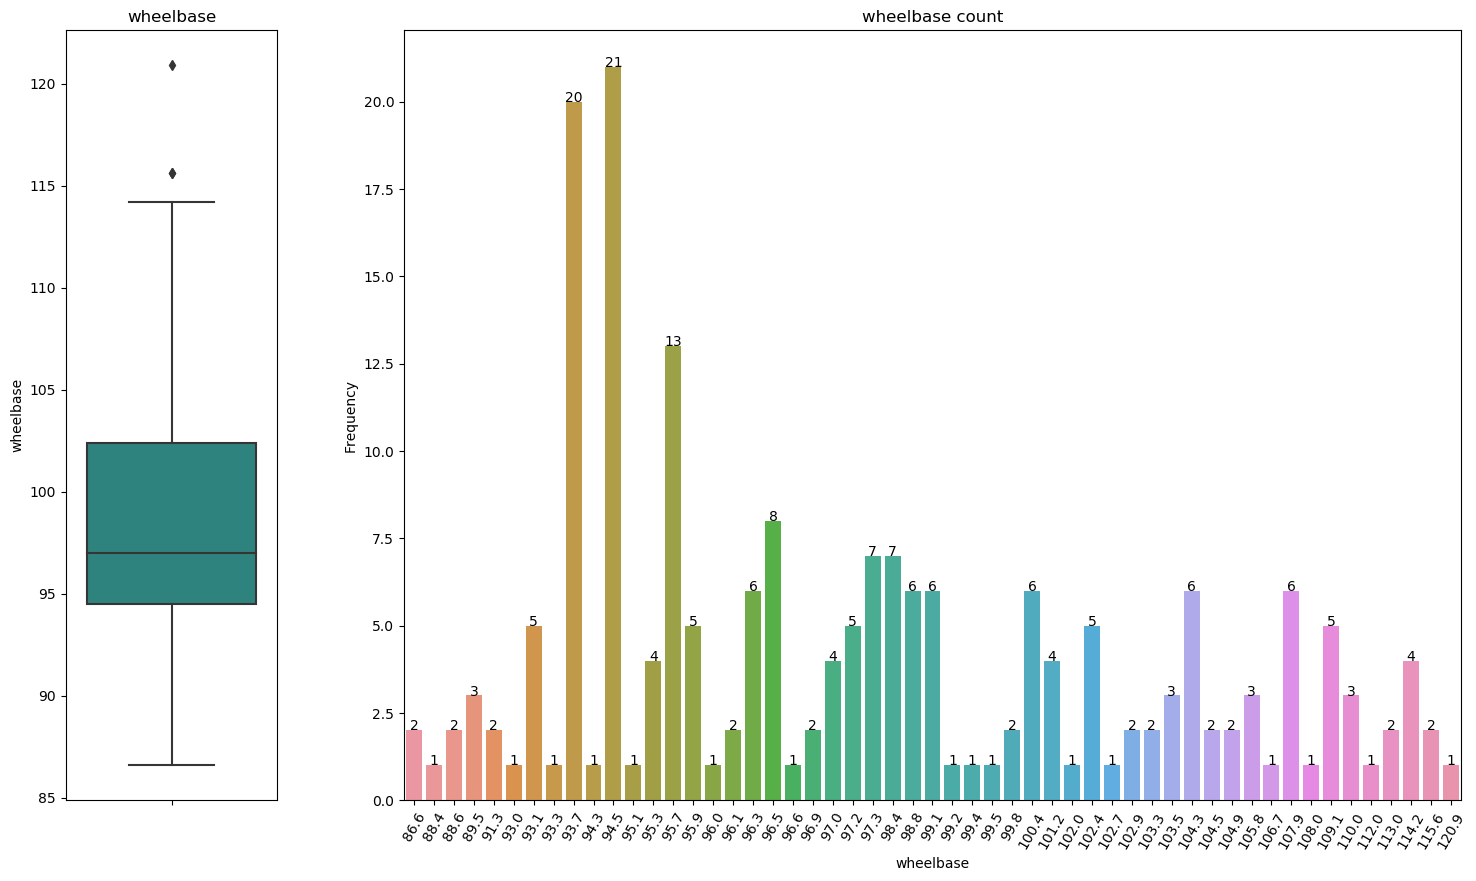

Inference: In the wheelbase 94.5 is more preferred. But there are clearly some outliers above 98 percentile


In [34]:
columnName = 'wheelbase'
print('Mean of ' + columnName + ' = ', round(master_frame[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_frame[columnName].median())
print('Mode of ' + columnName + ' = ', master_frame[columnName].mode())

# Plotting the distribution plot to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_frame[columnName], palette='viridis')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(freq, columnName, 'Frequency', gs[1],
                                columnName + ' count', columnName, 'Frequency', 60,
                                None,
                                'Inference: In the ' + columnName + ' 94.5'
                                + ' is more preferred. But there are clearly some outliers above 98 percentile',
                                True, True)

#### Analysis of quantitative variable carlength

Mean of carlength =  174.05
Median of carlength =  173.2
Mode of carlength =  0    157.3
dtype: float64


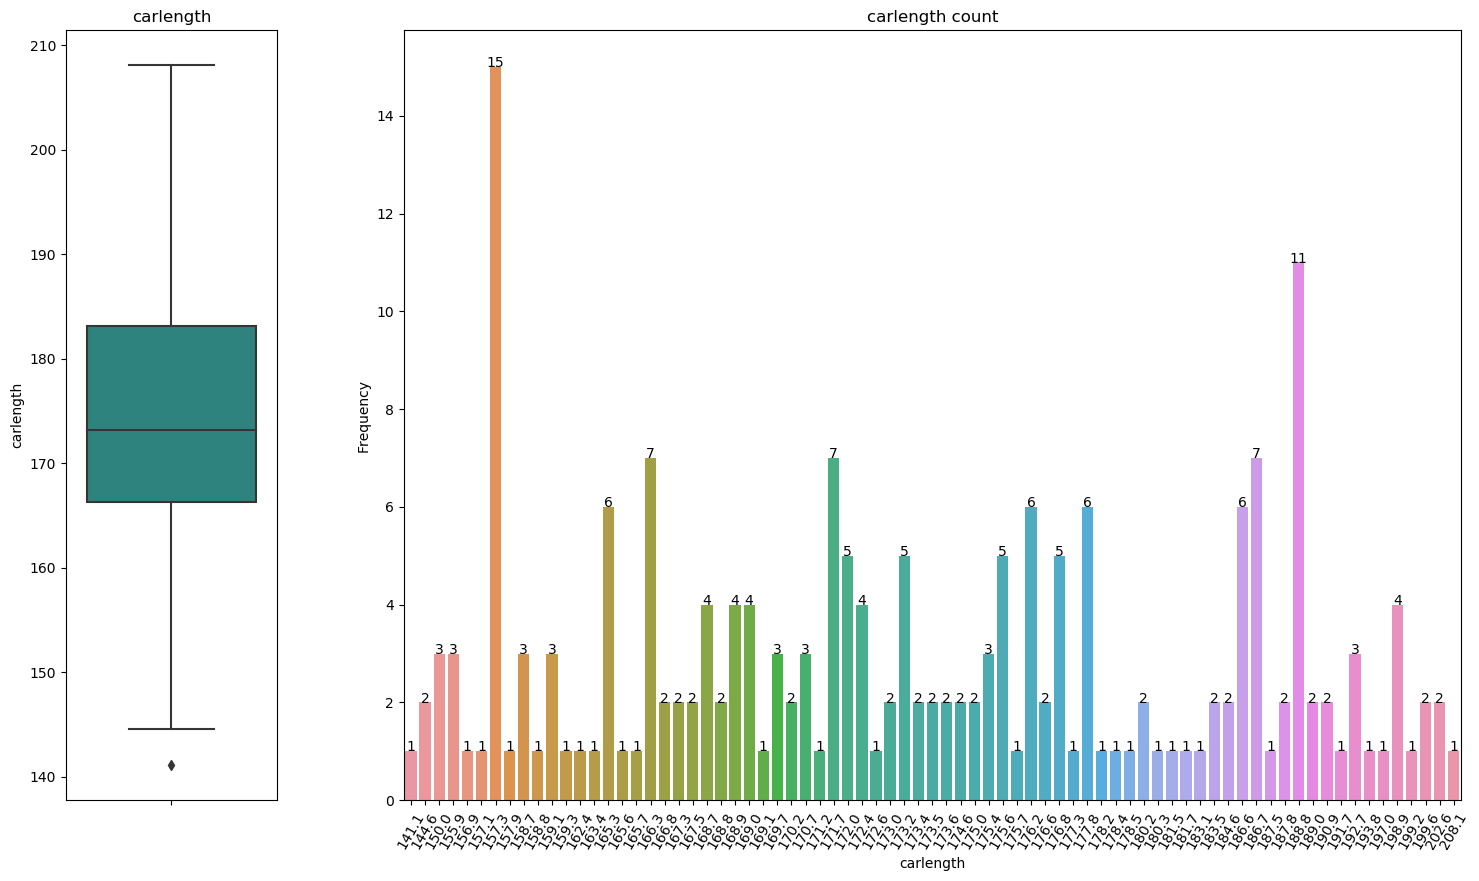

Inference: In the carlength 157.3 is more preferred. But there are clearly one outlier below 5 percentile


In [35]:
columnName = 'carlength'
print('Mean of ' + columnName + ' = ', round(master_frame[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_frame[columnName].median())
print('Mode of ' + columnName + ' = ', master_frame[columnName].mode())

# Plotting the distribution plot to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_frame[columnName], palette='viridis')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(freq, columnName, 'Frequency', gs[1],
                                columnName + ' count', columnName, 'Frequency', 60,
                                None,
                                'Inference: In the ' + columnName + ' 157.3'
                                + ' is more preferred. But there are clearly one outlier below' + ' 5' + ' percentile',
                                True, True)

#### Analysis of quantitative variable carwidth

Mean of carwidth =  65.91
Median of carwidth =  65.5
Mode of carwidth =  0    63.8
dtype: float64


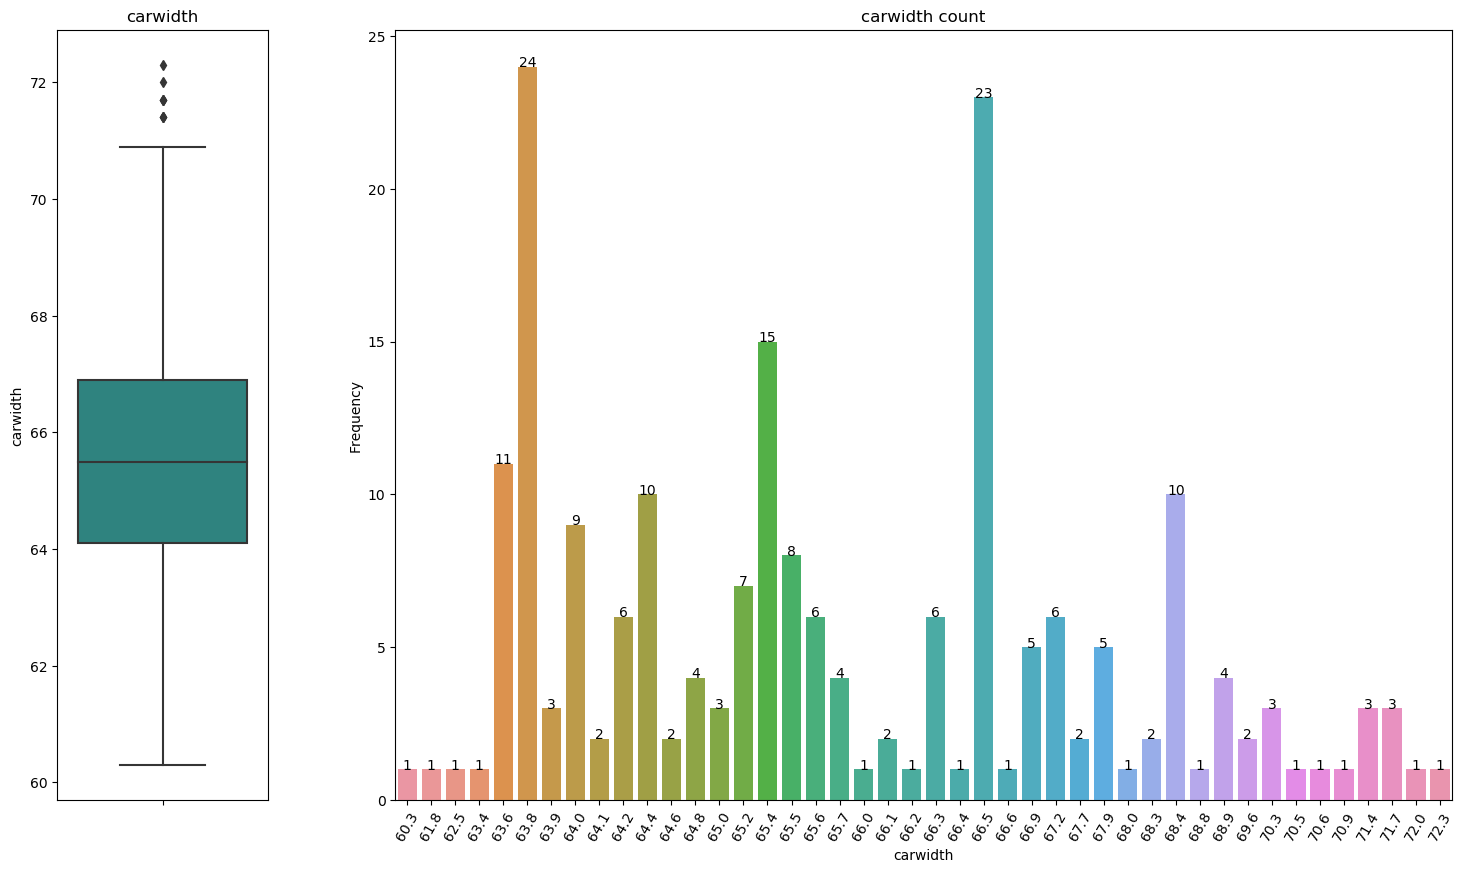

Inference: In the carwidth 63.8 is more preferred. But there are clearly some outliers above 98 percentile


In [36]:
columnName = 'carwidth'
print('Mean of ' + columnName + ' = ', round(master_frame[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_frame[columnName].median())
print('Mode of ' + columnName + ' = ', master_frame[columnName].mode())

# Plotting the distribution plot to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_frame[columnName], palette='viridis')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(freq, columnName, 'Frequency', gs[1],
                                columnName + ' count', columnName, 'Frequency', 60,
                                None,
                                'Inference: In the ' + columnName + ' 63.8'
                                + ' is more preferred. But there are clearly some outliers above' + ' 98' + ' percentile',
                                True, True)

#### Analysis of carheight

Mean of carheight =  53.72
Median of carheight =  54.1
Mode of carheight =  0    50.8
dtype: float64


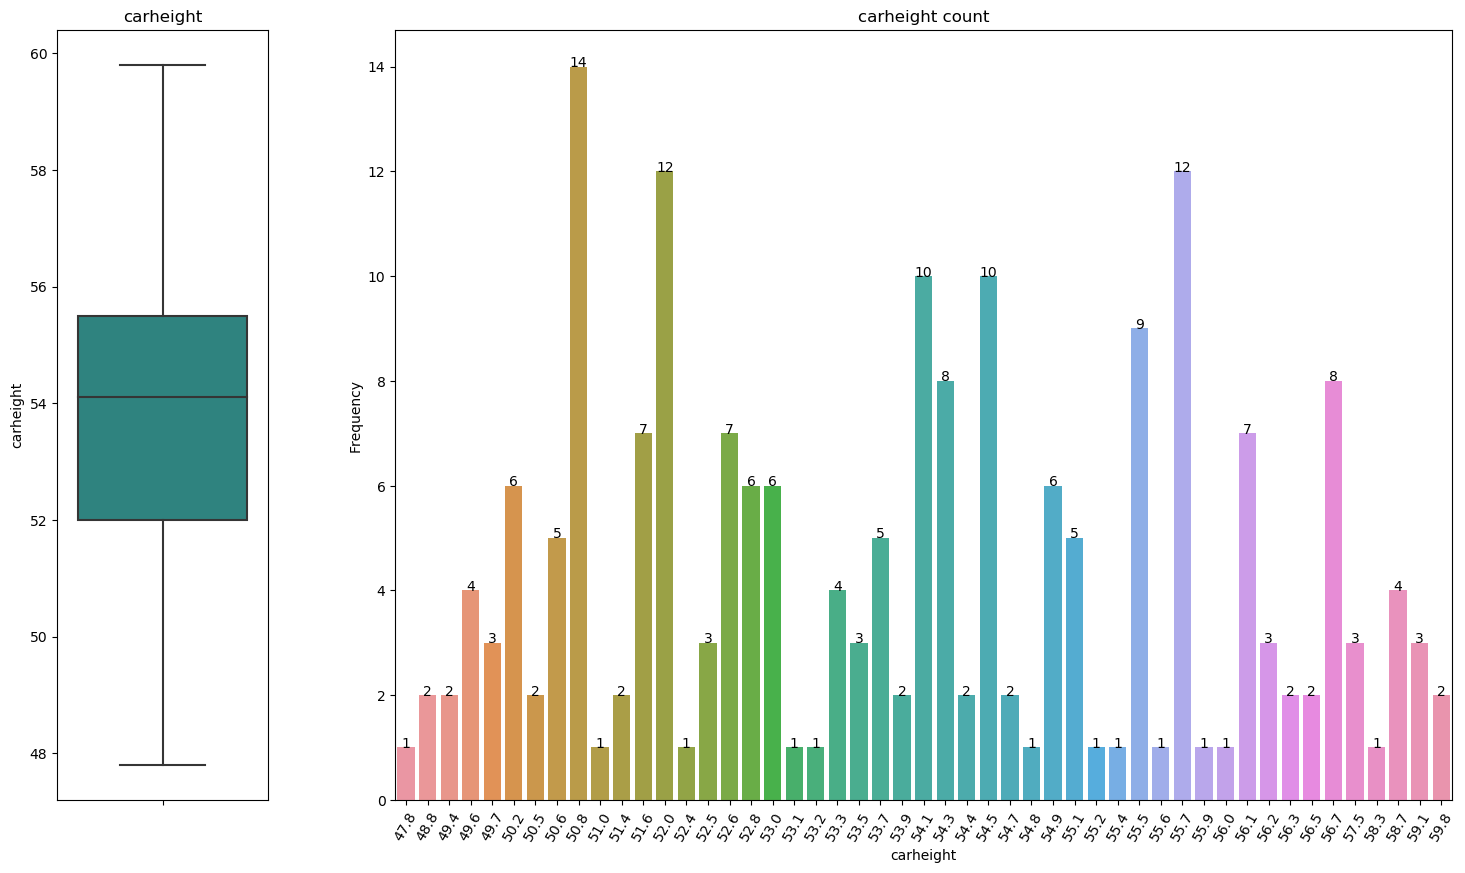

Inference: In the carheight 50.8 is more preferred.


In [37]:
columnName = 'carheight'
print('Mean of ' + columnName + ' = ', round(master_frame[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_frame[columnName].median())
print('Mode of ' + columnName + ' = ', master_frame[columnName].mode())

# Plotting the distribution plot to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_frame[columnName], palette='viridis')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(freq, columnName, 'Frequency', gs[1],
                                columnName + ' count', columnName, 'Frequency', 60,
                                None,
                                'Inference: In the ' + columnName + ' 50.8'
                                + ' is more preferred.',
                                True, True)

#### Analysis of  curbweight

Mean of curbweight =  2555.57
Median of curbweight =  2414.0
Mode of curbweight =  0    2385
dtype: int64


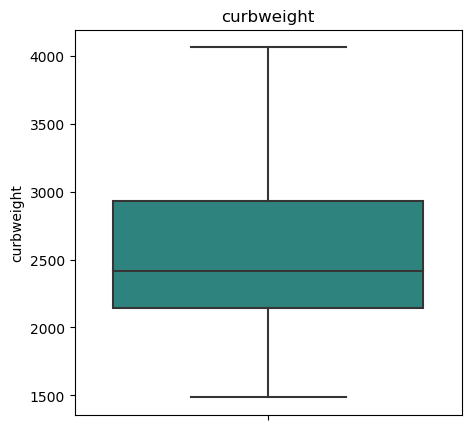

curbweight Dont have any Outliers...


In [38]:
columnName = 'curbweight'
print('Mean of ' + columnName + ' = ', round(master_frame[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_frame[columnName].median())
print('Mode of ' + columnName + ' = ', master_frame[columnName].mode())

# Plotting the distribution plot of curbweight to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(5,5))
sns.boxplot(y=master_frame[columnName], palette='viridis')
plt.ylabel(columnName)
plt.title(columnName)
plt.show()

print(columnName + ' Dont have any Outliers...')

#### Analysis of  enginesize

Mean of enginesize =  126.91
Median of enginesize =  120.0
Mode of enginesize =  0     92
1    122
dtype: int64


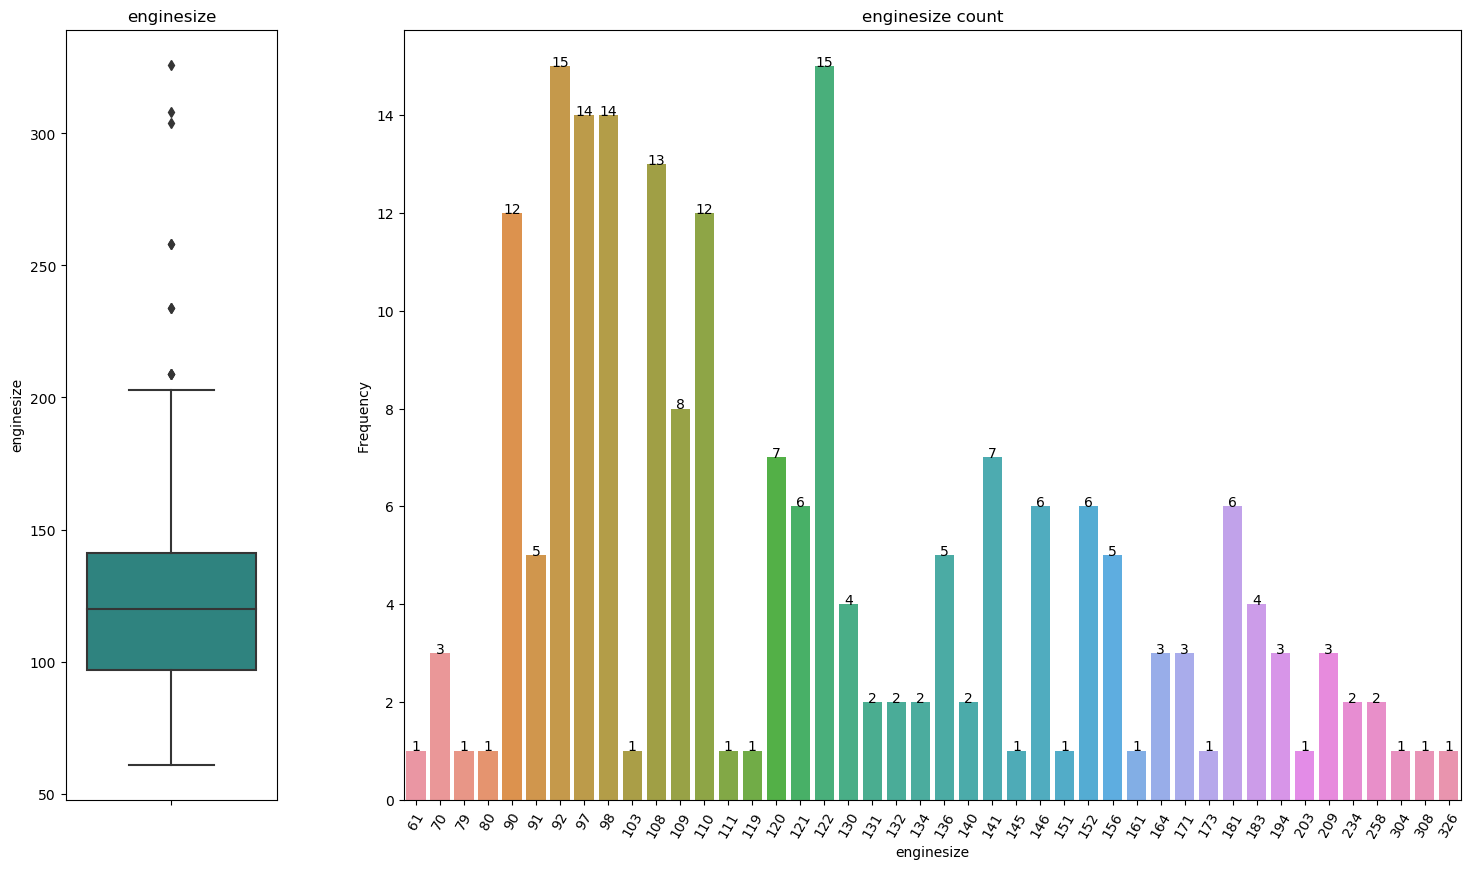

Inference: In the enginesize 122 & 92 are more preferred. But there are clearly some outliers above 90 percentile


In [39]:
columnName = 'enginesize'
print('Mean of ' + columnName + ' = ', round(master_frame[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_frame[columnName].median())
print('Mode of ' + columnName + ' = ', master_frame[columnName].mode())

# Plotting the distribution plot to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_frame[columnName], palette='viridis')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(freq, columnName, 'Frequency', gs[1],
                                columnName + ' count', columnName, 'Frequency', 60,
                                None,
                                'Inference: In the ' + columnName + ' 122 & 92'
                                + ' are more preferred. But there are clearly some outliers above' + ' 90' + ' percentile',
                                True, True)

#### Analysis of quantitative variable boreratio

Mean of boreratio =  3.33
Median of boreratio =  3.31
Mode of boreratio =  0    3.62
dtype: float64


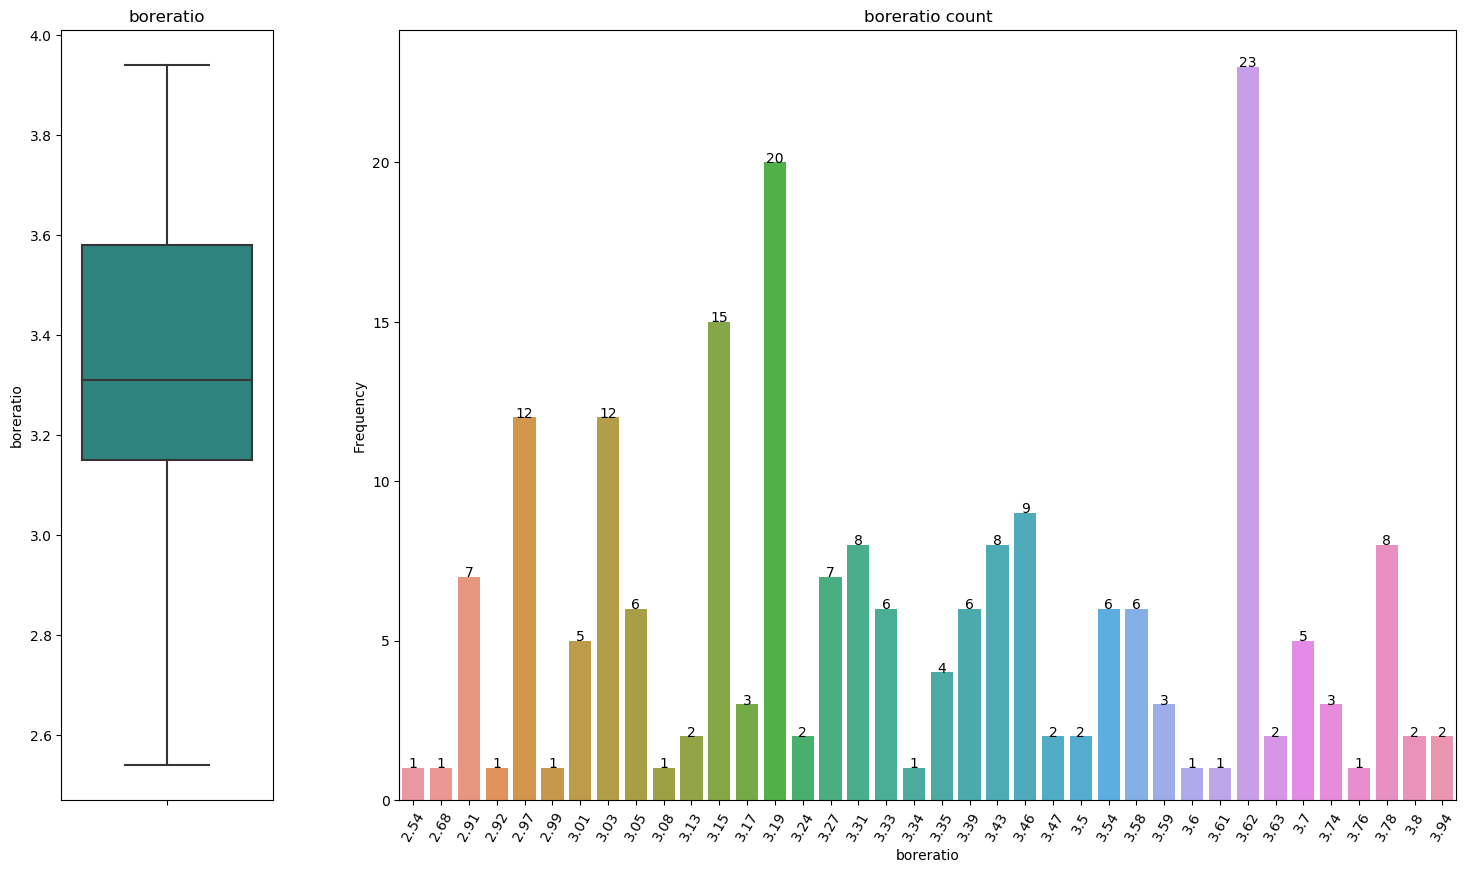

Inference: In the boreratio 3.62 is more preferred. There isn't any outliers.


In [40]:
columnName = 'boreratio'
print('Mean of ' + columnName + ' = ', round(master_frame[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_frame[columnName].median())
print('Mode of ' + columnName + ' = ', master_frame[columnName].mode())

# Plotting the distribution plot to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_frame[columnName], palette='viridis')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(freq, columnName, 'Frequency', gs[1],
                                columnName + ' count', columnName, 'Frequency', 60,
                                None,
                                'Inference: In the ' + columnName + ' 3.62'
                                + ' is more preferred. There isn\'t any outliers.',
                                True, True)

#### Analysis of ordered catagorical variable stroke

Mean of stroke =  3.26
Median of stroke =  3.29
Mode of stroke =  0    3.4
dtype: float64


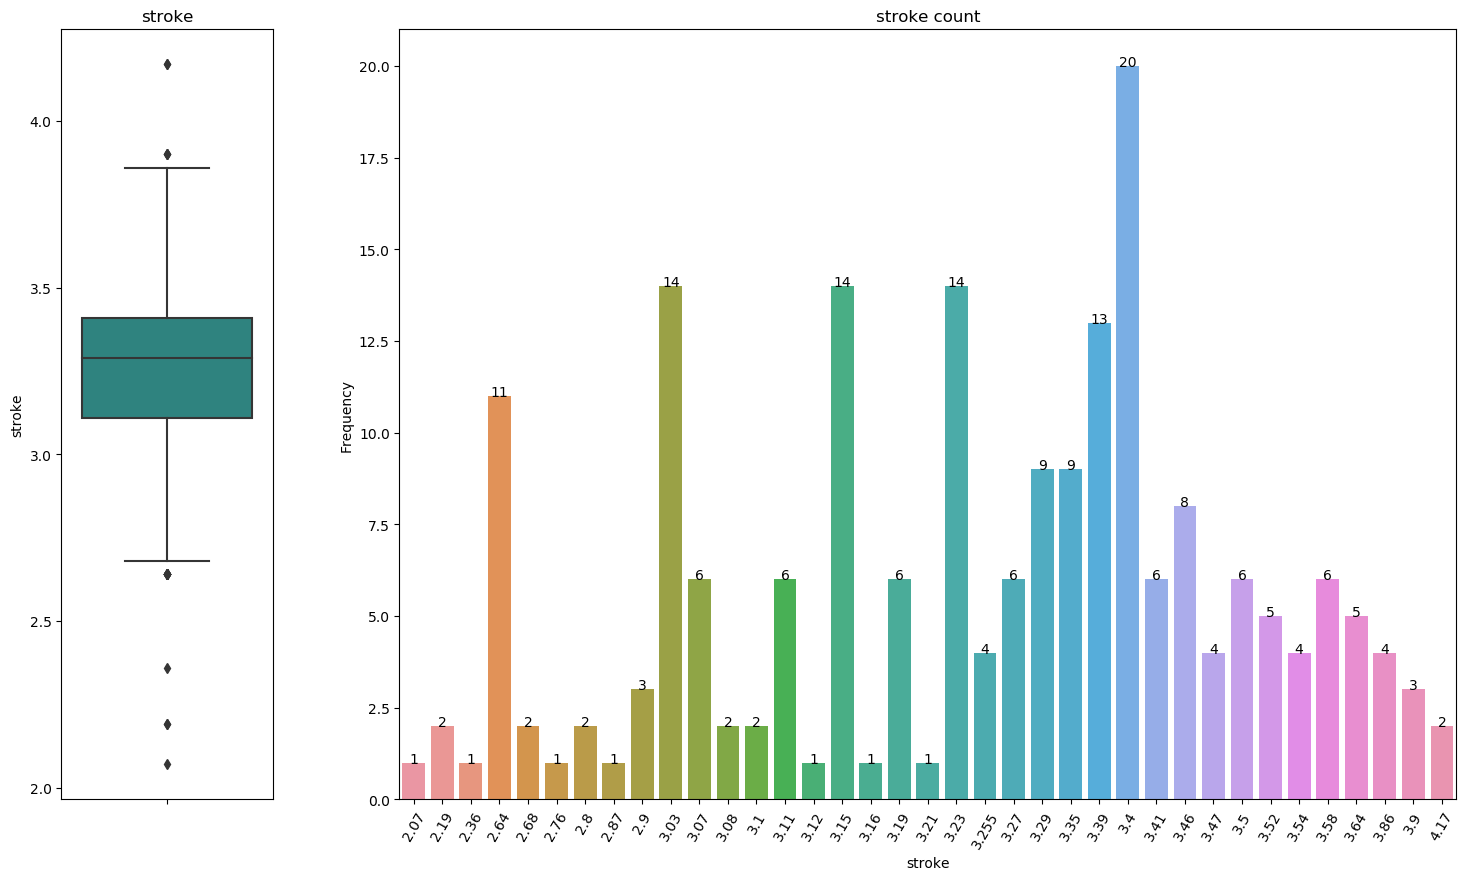

Inference: In the stroke 3.4 is more preferred. But there are clearly some outliers


In [41]:
columnName = 'stroke'
print('Mean of ' + columnName + ' = ', round(master_frame[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_frame[columnName].median())
print('Mode of ' + columnName + ' = ', master_frame[columnName].mode())

# Plotting the distribution plot to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_frame[columnName], palette='viridis')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(freq, columnName, 'Frequency', gs[1],
                                columnName + ' count', columnName, 'Frequency', 60,
                                None,
                                'Inference: In the ' + columnName + ' 3.4'
                                + ' is more preferred. But there are clearly some outliers',
                                True, True)

#### Analysis of quantitative variable compressionratio

Mean of compressionratio =  10.14
Median of compressionratio =  9.0
Mode of compressionratio =  0    9.0
dtype: float64


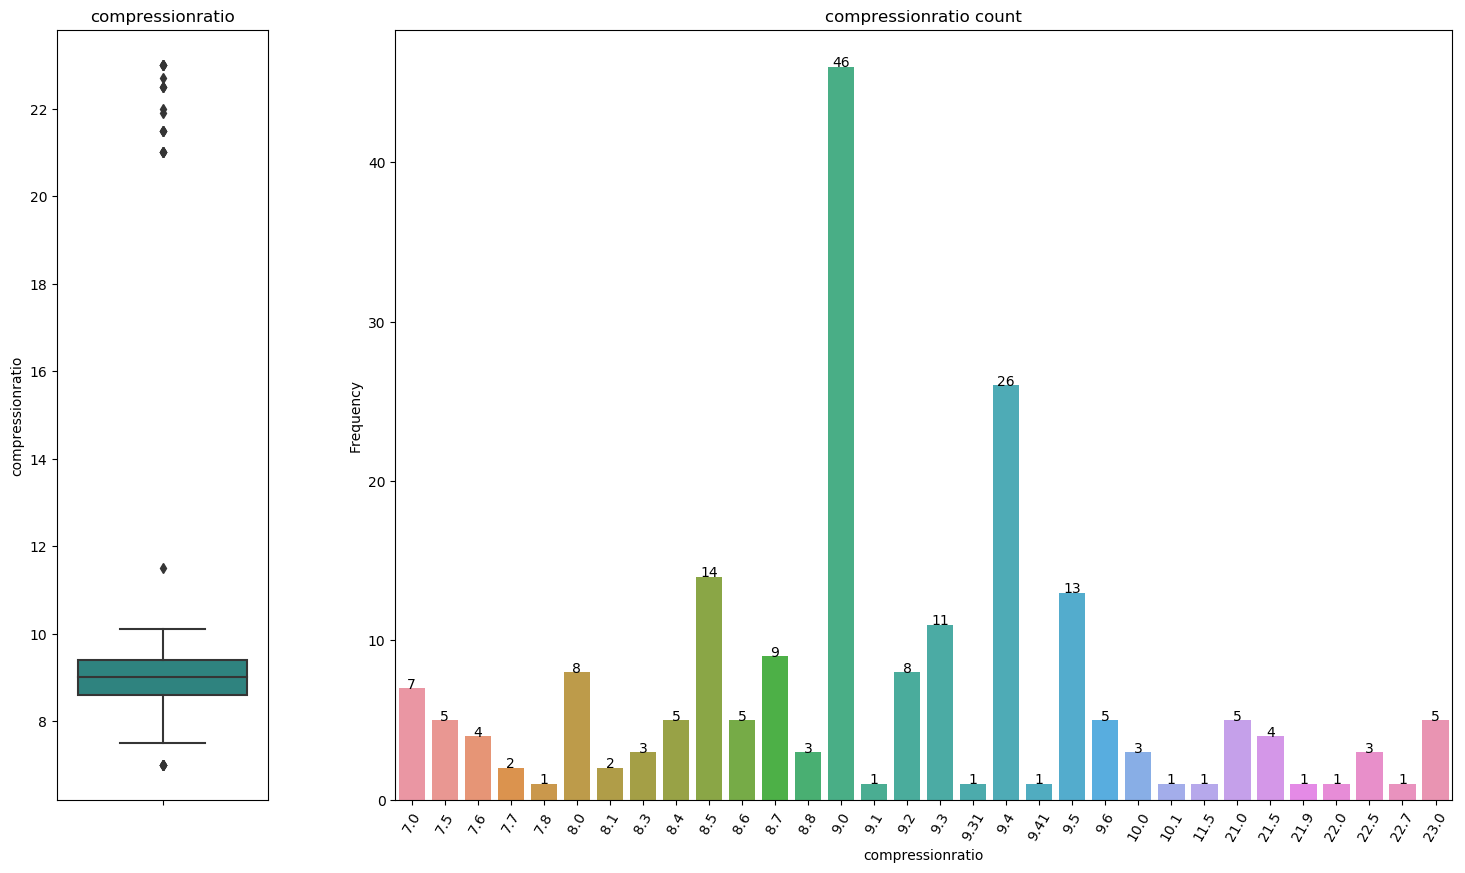

Inference: In the compressionratio 9.0 is more preferred. But there are clearly many outliers


In [42]:
columnName = 'compressionratio'
print('Mean of ' + columnName + ' = ', round(master_frame[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_frame[columnName].median())
print('Mode of ' + columnName + ' = ', master_frame[columnName].mode())

# Plotting the distribution plot to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_frame[columnName], palette='viridis')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(freq, columnName, 'Frequency', gs[1],
                                columnName + ' count', columnName, 'Frequency', 60,
                                None,
                                'Inference: In the ' + columnName + ' 9.0'
                                + ' is more preferred. But there are clearly many outliers',
                                True, True)

#### Analysis of quantitative variable horsepower

Mean of horsepower =  104.12
Median of horsepower =  95.0
Mode of horsepower =  0    68
dtype: int64


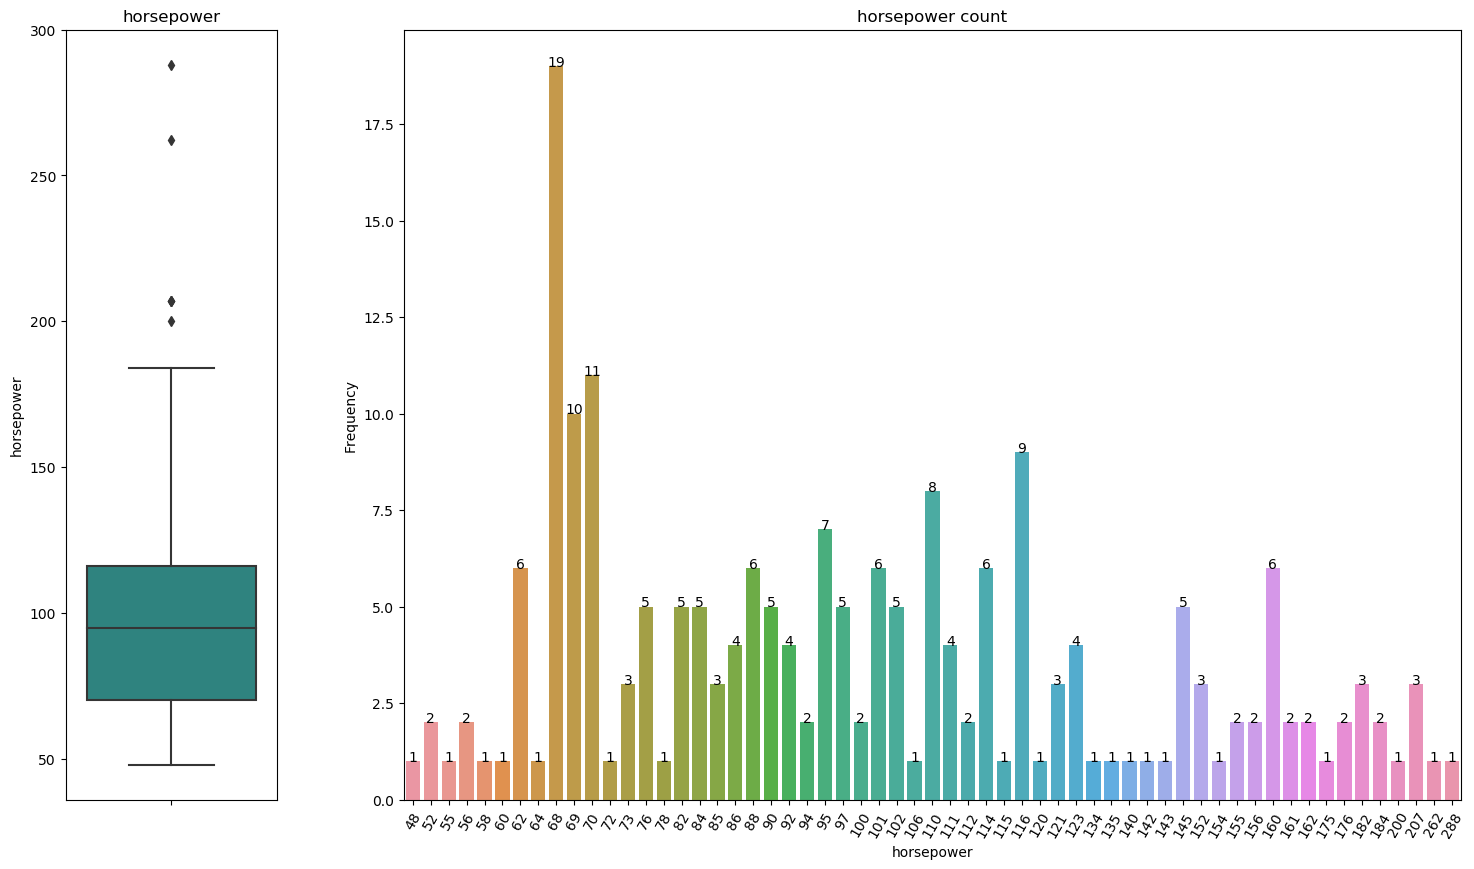

Inference: In the horsepower 68 is more preferred. But there are clearly some outliers above 98 percentile


In [43]:
columnName = 'horsepower'
print('Mean of ' + columnName + ' = ', round(master_frame[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_frame[columnName].median())
print('Mode of ' + columnName + ' = ', master_frame[columnName].mode())

# Plotting the distribution plot to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_frame[columnName], palette='viridis')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(freq, columnName, 'Frequency', gs[1],
                                columnName + ' count', columnName, 'Frequency', 60,
                                None,
                                'Inference: In the ' + columnName + ' 68'
                                + ' is more preferred. But there are clearly some outliers above' + ' 98' + ' percentile',
                                True, True)

#### Analysis of quantitative variable peakrpm

Mean of peakrpm =  5125.12
Median of peakrpm =  5200.0
Mode of peakrpm =  0    5500
dtype: int64


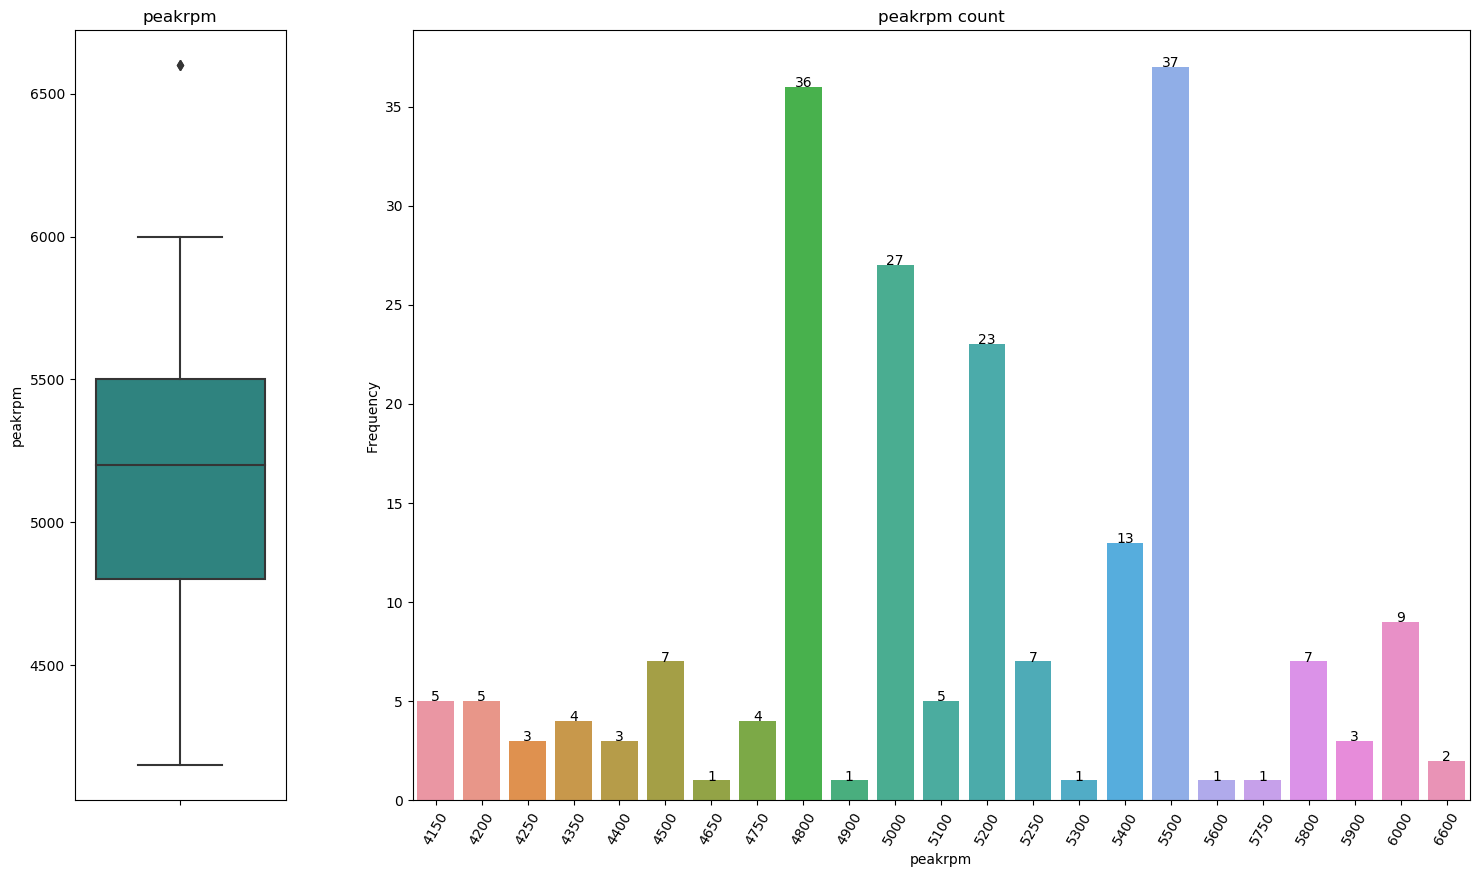

Inference: In the peakrpm 5500 and 4800 are more preferred. But there is clearly one outlier above 98 percentile


In [44]:
columnName = 'peakrpm'
print('Mean of ' + columnName + ' = ', round(master_frame[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_frame[columnName].median())
print('Mode of ' + columnName + ' = ', master_frame[columnName].mode())

# Plotting the distribution plot to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_frame[columnName], palette='viridis')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(freq, columnName, 'Frequency', gs[1],
                                columnName + ' count', columnName, 'Frequency', 60,
                                None,
                                'Inference: In the ' + columnName + ' 5500 and 4800'
                                + ' are more preferred. But there is clearly one outlier above' + ' 98' + ' percentile',
                                True, True)

#### Analysis of quantitative variable citympg

Mean of citympg =  25.22
Median of citympg =  24.0
Mode of citympg =  0    31
dtype: int64


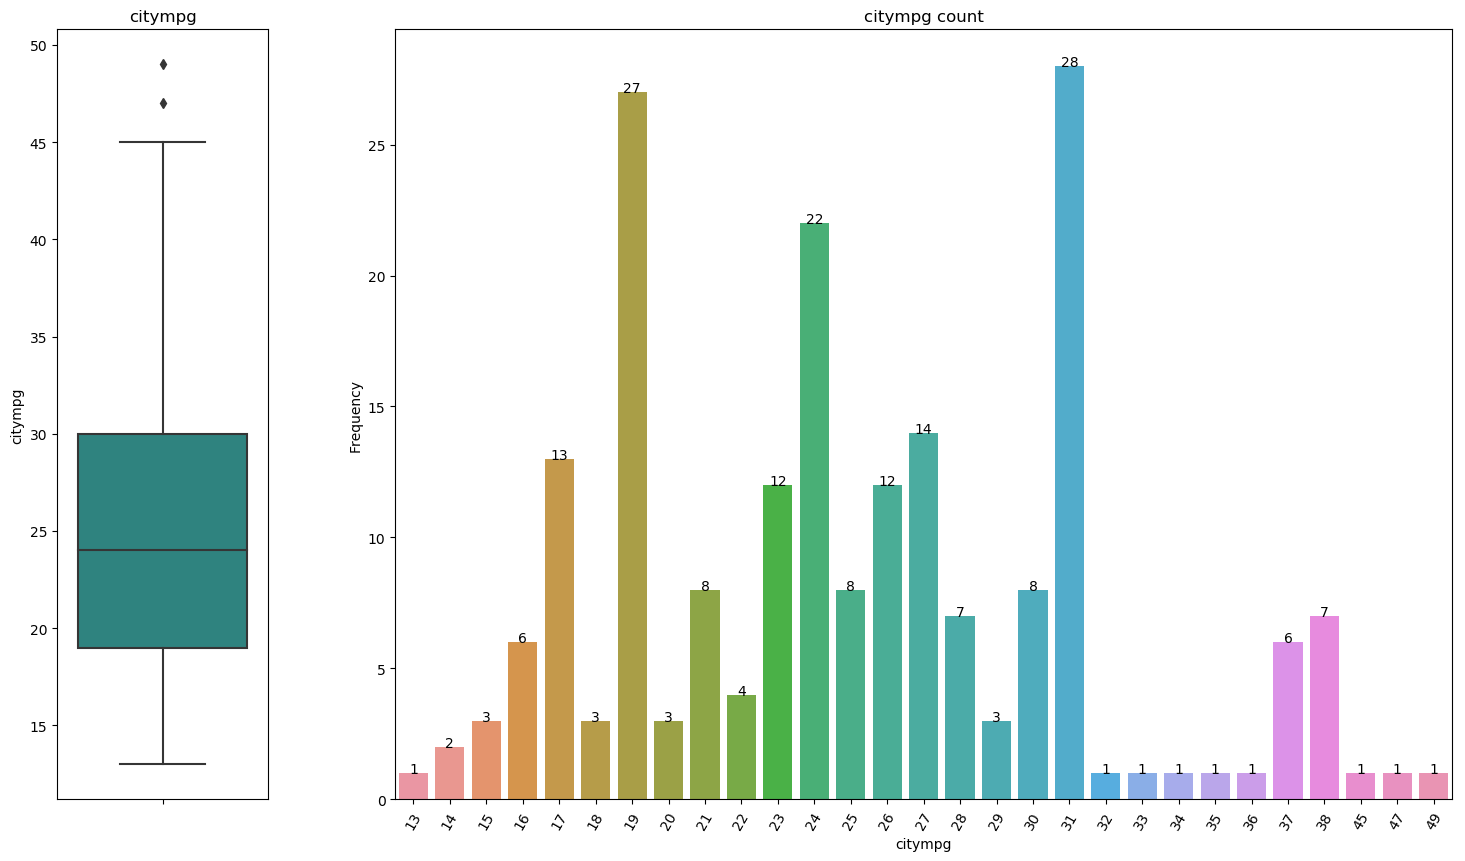

Inference: In the citympg 19, 24 & 31 are more preferred. But there are clearly some outliers above 98 percentile


In [45]:
columnName = 'citympg'
print('Mean of ' + columnName + ' = ', round(master_frame[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_frame[columnName].median())
print('Mode of ' + columnName + ' = ', master_frame[columnName].mode())

# Plotting the distribution plot to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_frame[columnName], palette='viridis')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(freq, columnName, 'Frequency', gs[1],
                                columnName + ' count', columnName, 'Frequency', 60,
                                None,
                                'Inference: In the ' + columnName + ' 19, 24 & 31'
                                + ' are more preferred. But there are clearly some outliers above' + ' 98' + ' percentile',
                                True, True)

#### Analysis of quantitative variable highwaympg

Mean of highwaympg =  30.75
Median of highwaympg =  30.0
Mode of highwaympg =  0    25
dtype: int64


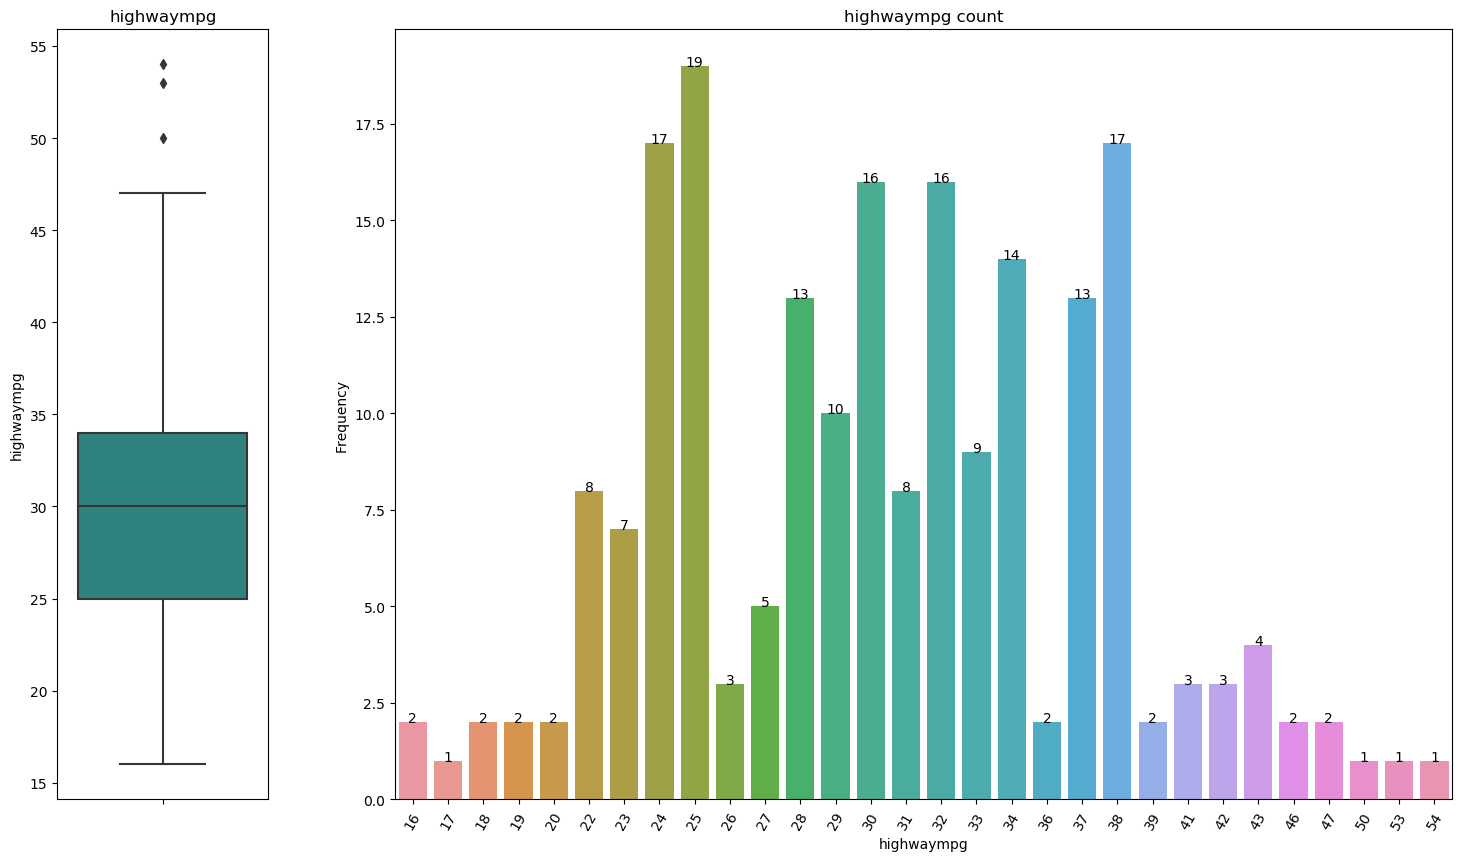

Inference: In the highwaympg 24, 25, 30, 32 & 38 are more preferred. But there are clearly some outliers above 98 percentile


In [46]:
columnName = 'highwaympg'
print('Mean of ' + columnName + ' = ', round(master_frame[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_frame[columnName].median())
print('Mode of ' + columnName + ' = ', master_frame[columnName].mode())

# Plotting the distribution plot to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

plt.subplot(gs[0])
sns.boxplot(y=master_frame[columnName], palette='viridis')
plt.ylabel(columnName)
plt.title(columnName)

# Plot frequency bar chart  
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')

draw_bar_chart_subplot_gridspec(freq, columnName, 'Frequency', gs[1],
                                columnName + ' count', columnName, 'Frequency', 60,
                                None,
                                'Inference: In the ' + columnName + ' 24, 25, 30, 32 & 38'
                                + ' are more preferred. But there are clearly some outliers above' + ' 98' + ' percentile',
                                True, True)

#### Analysis of quantitative variable price

Mean of price =  13276.71
Median of price =  10295.0
Mode of price =  0      5572.0
1      6229.0
2      6692.0
3      7295.0
4      7609.0
5      7775.0
6      7898.0
7      7957.0
8      8495.0
9      8845.0
10     8916.5
11     8921.0
12     9279.0
13    13499.0
14    16500.0
15    18150.0
dtype: float64


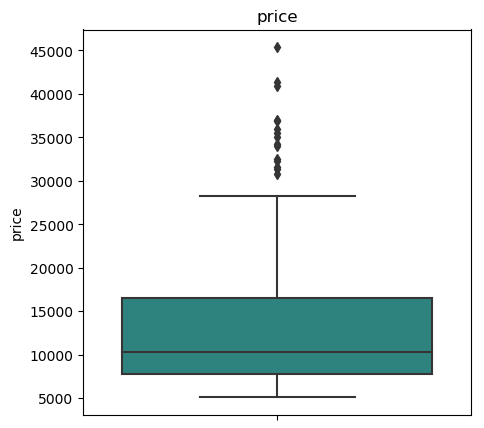

There is huge variance in pricings and most common pricings are shown in the mode of price above.


In [47]:
columnName = 'price'
print('Mean of ' + columnName + ' = ', round(master_frame[columnName].mean(), 2))
print('Median of ' + columnName + ' = ', master_frame[columnName].median())
print('Mode of ' + columnName + ' = ', master_frame[columnName].mode())

# Plotting the distribution plot to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(5,5))
sns.boxplot(y=master_frame[columnName], palette='viridis')
plt.ylabel(columnName)
plt.title(columnName)
plt.show()

print('There is huge variance in pricings and most common pricings are shown in the mode of price above.')

#### Analysis of unordered catagorical variable CompanyName

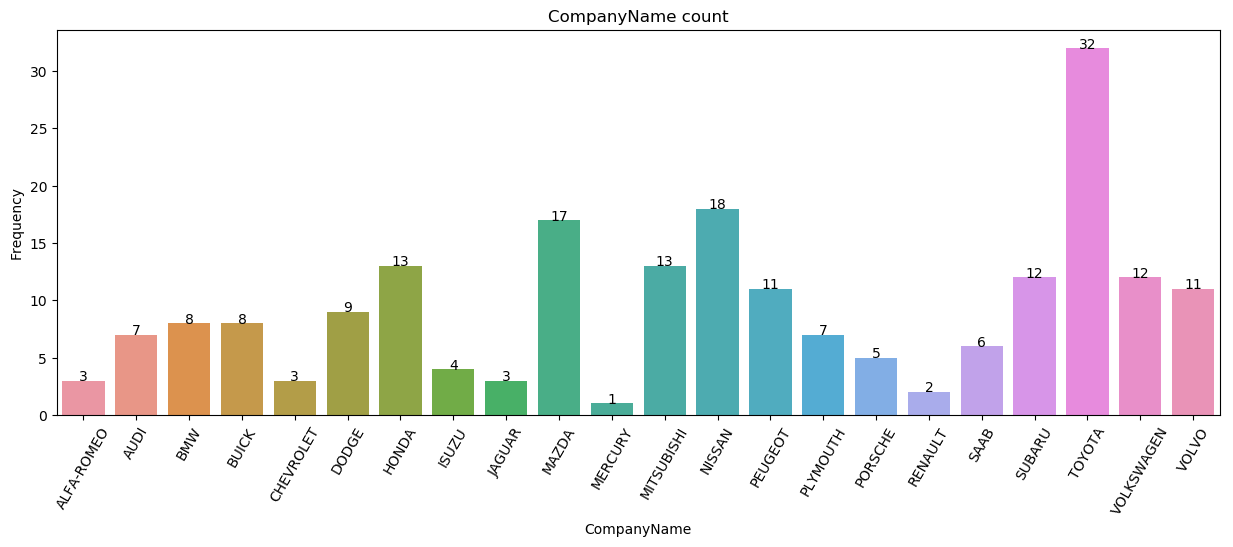

Inference: In the CompanyName Toyota is having more models


{'symboling': '-2',
 'fueltype': 'diesel',
 'aspiration': 'turbo',
 'doornumber': 'two',
 'carbody': 'convertible',
 'drivewheel': '4wd',
 'enginelocation': 'rear',
 'enginetype': 'dohcv',
 'cylindernumber': 'three',
 'fuelsystem': 'spfi',
 'CompanyName': 'MERCURY'}

In [48]:
# Plot frequency bar chart  
columnName = 'CompanyName'
freq = master_frame.groupby(master_frame[columnName]).size().reset_index(name='Frequency')
draw_bar_chart(freq, columnName, "Frequency", 15, 5,
               columnName + ' count',
               columnName, 'Frequency', 
               60, None,
               'Inference: In the ' + columnName + ' Toyota' + ' is having more models',
               True)

# Any one of these columns can be removed while dummy variable creation
col_to_remove_forDummy[columnName] = 'MERCURY'
col_to_remove_forDummy

## Segmented Univariate Analysis

#### Lets check if there is any relations ship between fuel type and fuel system

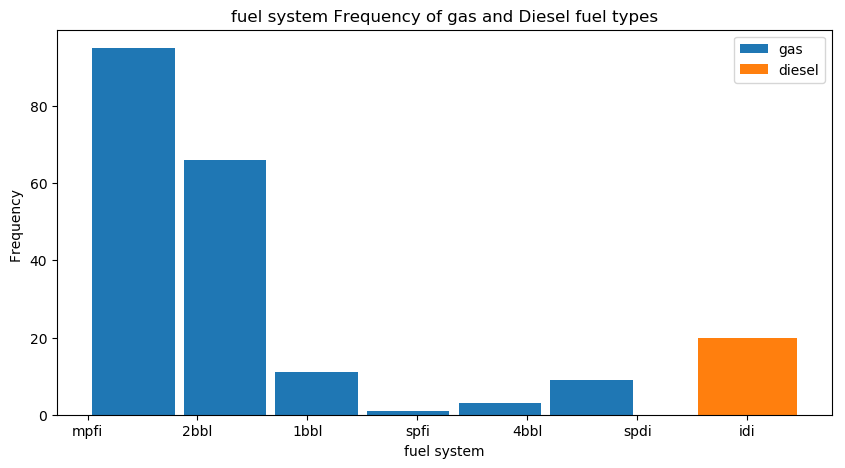

gas fuel systems = ['mpfi' '2bbl' '1bbl' 'spfi' '4bbl' 'spdi']
diesel fuel systems = ['idi']
Inference: Both fuel types has different fuel systems so drop the fuel type variable, as one is enough to distinguish.


In [49]:
#Frequency Chart
gas_fuelsystem = master_frame[master_frame.fueltype == 'gas'].fuelsystem
diesel_fuelsystem = master_frame[master_frame.fueltype == 'diesel'].fuelsystem

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(10,5))

plt.hist([gas_fuelsystem], bins=6, rwidth=0.90)
plt.hist([diesel_fuelsystem], bins=1, rwidth=0.90)

plt.xlabel("fuel system")
plt.ylabel("Frequency ")

plt.legend(master_frame.fueltype.unique())
plt.xticks(rotation=0)

plt.title('fuel system Frequency of gas and Diesel fuel types')

plt.show()

print('gas fuel systems =', gas_fuelsystem.unique())
print('diesel fuel systems =', diesel_fuelsystem.unique())

print('Inference: Both fuel types has different fuel systems so drop the fuel type variable, as one is enough to distinguish.')

#### Drop fueltype column as fuel system is highle correlated with this we can keep fuel system as there will be a difference in price

In [50]:
try:
    print('Dropping fueltype column', '...')
    del col_to_remove_forDummy['fueltype']
    master_frame.drop('fueltype', axis=1, inplace=True)
except:
    print('\tColumn already dropped...')
col_to_remove_forDummy

Dropping fueltype column ...


{'symboling': '-2',
 'aspiration': 'turbo',
 'doornumber': 'two',
 'carbody': 'convertible',
 'drivewheel': '4wd',
 'enginelocation': 'rear',
 'enginetype': 'dohcv',
 'cylindernumber': 'three',
 'fuelsystem': 'spfi',
 'CompanyName': 'MERCURY'}

## Bivariate Analysis

#### Lets build a Correlation plot for all numerical variables and see there relations

In [51]:
CarPriceNumericDf = pd.DataFrame(master_frame.select_dtypes(exclude=['object']))

#Bivariate Coorelation Matrix
corr = round(CarPriceNumericDf.corr(),2)
corr.style.background_gradient()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.13,-0.01,-0.18,0.07,0.27,-0.04,0.03,-0.08
wheelbase,-0.53,1,0.87,0.8,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
carlength,-0.36,0.87,1,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.7,0.68
carwidth,-0.23,0.8,0.84,1,0.28,0.87,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.76
carheight,-0.54,0.59,0.49,0.28,1,0.3,0.07,0.17,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.12
curbweight,-0.23,0.78,0.88,0.87,0.3,1,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.8,0.84
enginesize,-0.11,0.57,0.68,0.74,0.07,0.85,1,0.58,0.2,0.03,0.81,-0.24,-0.65,-0.68,0.87
boreratio,-0.13,0.49,0.61,0.56,0.17,0.65,0.58,1,-0.06,0.01,0.57,-0.25,-0.58,-0.59,0.55
stroke,-0.01,0.16,0.13,0.18,-0.06,0.17,0.2,-0.06,1,0.19,0.08,-0.07,-0.04,-0.04,0.08
compressionratio,-0.18,0.25,0.16,0.18,0.26,0.15,0.03,0.01,0.19,1,-0.2,-0.44,0.32,0.27,0.07


In [52]:
print('Inference: Price has a high correlation with engine size, followed by curbweight and horsepower\n')

Inference: Price has a high correlation with engine size, followed by curbweight and horsepower



#### Visualise the pricing of various car companies

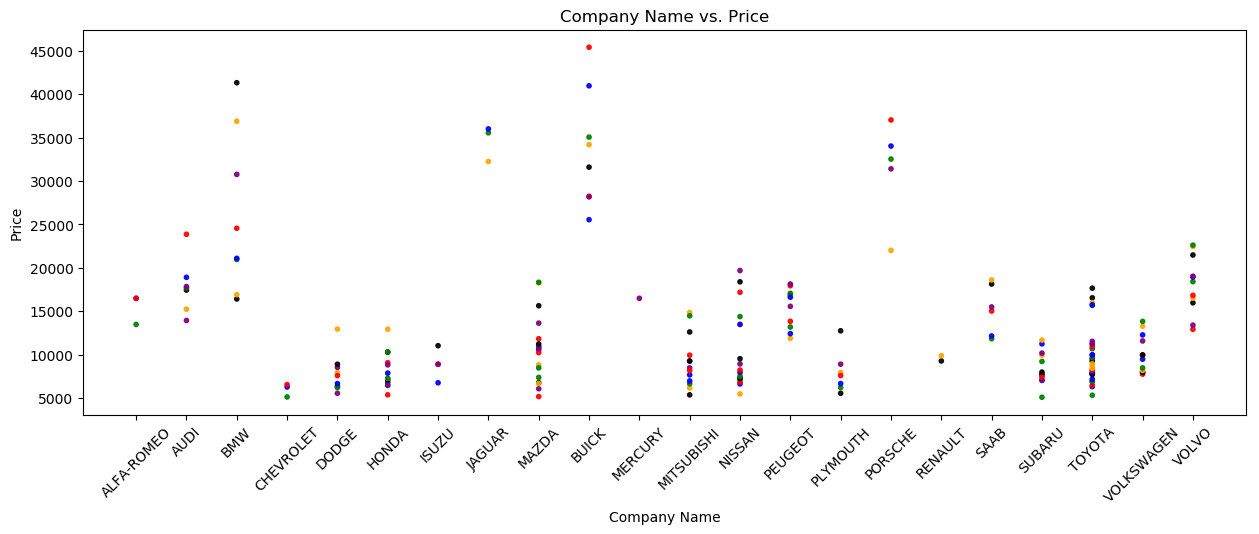

Inference: Buick which is a luxuary car maker has the highest pricings followed by BMW, Porsche and Jaguar
 
This indicates that the BRAND VALUE is a major factor in pricing.



In [53]:
# Scatter Plot (company vs price)
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "CompanyName", "price", 'Company Name', 'Price', 15, 5, 45, 'Company Name vs. Price', colors, 0.9)
print('Inference: Buick which is a luxuary car maker has the highest pricings followed by BMW, Porsche and Jaguar\n',
     '\nThis indicates that the BRAND VALUE is a major factor in pricing.\n')

#### Visualise symboling vs price
* Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 

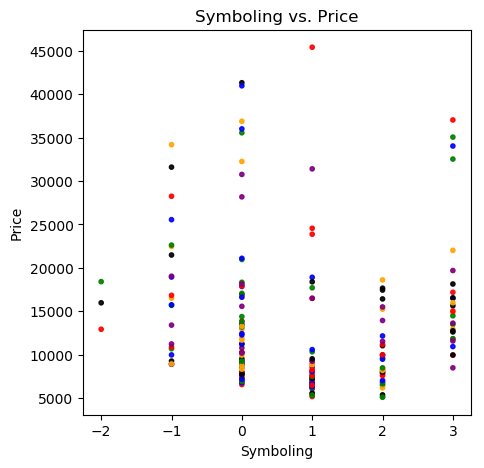

Inference: Insurance risk rating 0 has more observations.
 risk rating -2 has least number of observations.



In [54]:
# Scatter Plot 
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "symboling", "price", 'Symboling', 'Price', 5, 5, 0, 'Symboling vs. Price', colors, 0.9)
print('Inference: Insurance risk rating 0 has more observations.\n', 
      'risk rating -2 has least number of observations.\n')

#### Visualise aspiration vs price
* Aspiration used in a car (Categorical)

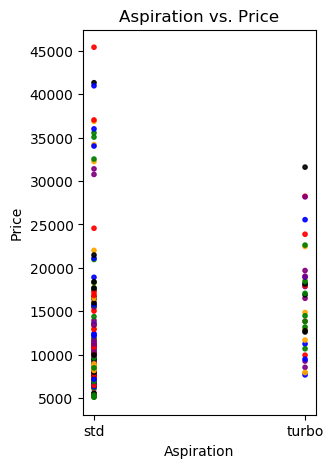

Inference: There is significance difference in price ranges of both Aspiration types.
 This will be retained for further analysis


In [55]:
# Scatter Plot 
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "aspiration", "price", 'Aspiration', 'Price', 3, 5, 0, 'Aspiration vs. Price', colors, 0.9)
print('Inference: There is significance difference in price ranges of both Aspiration types.\n',
      'This will be retained for further analysis')

#### Visualise doornumber vs price
* Number of doors in a car (Categorical)

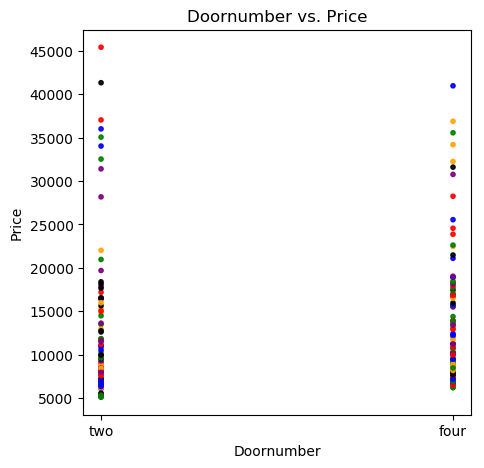

Inference: There is not much significance difference in price ranges of both doornumbers.
 how ever the lowest price of 4 door is higher than 2 door, so This will be retained for further analysis


In [56]:
# Scatter Plot 
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "doornumber", "price", 'Doornumber', 'Price', 5, 5, 0, 'Doornumber vs. Price', colors, 0.9)
print('Inference: There is not much significance difference in price ranges of both doornumbers.\n',
      'how ever the lowest price of 4 door is higher than 2 door, so This will be retained for further analysis')

#### Visualise carbody vs price
* body of car (Categorical)

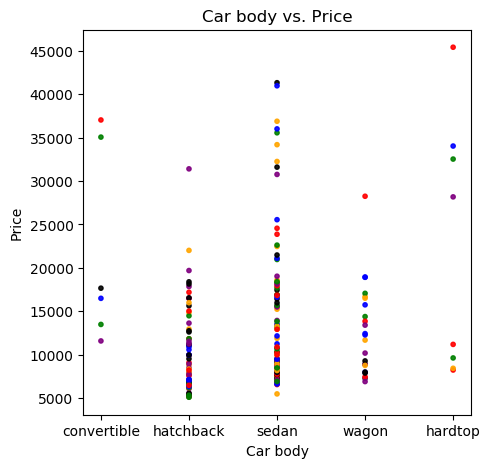

Inference: There is significance variation on price ranges for all five body types.
 This will be retained for further analysis.


In [57]:
# Scatter Plot 
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "carbody", "price", 'Car body', 'Price', 5, 5, 0, 'Car body vs. Price', colors, 0.9)
print('Inference: There is significance variation on price ranges for all five body types.\n',
      'This will be retained for further analysis.')

#### Visualise drivewheel vs price
* type of drive wheel (Categorical)

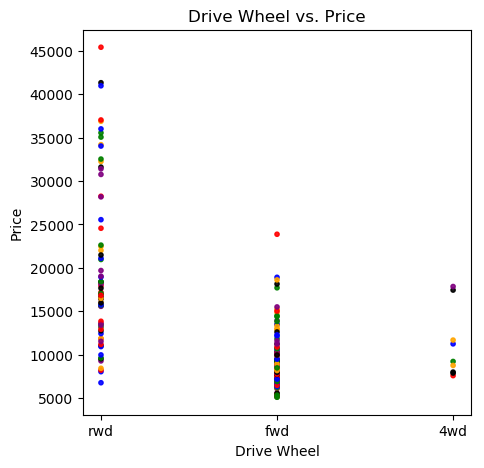

Inference: It is clearly visble thar the drive wheel has a direct impact in the price ranges.
 This will be retained for further analysis


In [58]:
# Scatter Plot 
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "drivewheel", "price", 'Drive Wheel', 'Price', 5, 5, 0, 'Drive Wheel vs. Price', colors, 0.9)
print('Inference: It is clearly visble thar the drive wheel has a direct impact in the price ranges.\n',
      'This will be retained for further analysis')

#### Visualise enginelocation vs price
* Location of car engine (Categorical)

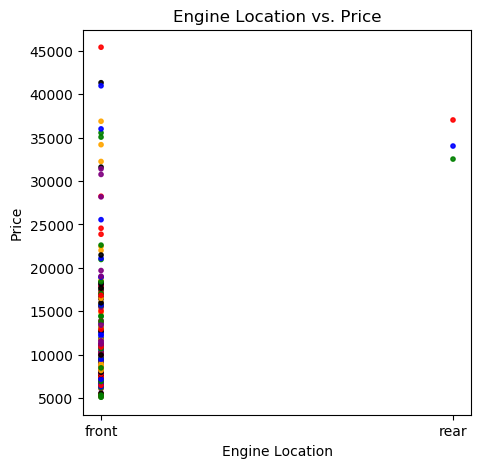

Inference: Engine locaitn front is having more numbers plus wide range of pricing
 and rear engine falls under highest price catagory.
 This will be retained for further analysis


In [59]:
# Scatter Plot (symboling vs price)
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "enginelocation", "price", 'Engine Location', 'Price',
                  5, 5, 0, 'Engine Location vs. Price', colors, 0.9)
print('Inference: Engine locaitn front is having more numbers plus wide range of pricing\n',
      'and rear engine falls under highest price catagory.\n',
      'This will be retained for further analysis')

#### Visualise wheelbase vs price
* Wheelbase of car (Numeric)- Distance betweeb the centre of front axle and centre of rear axle

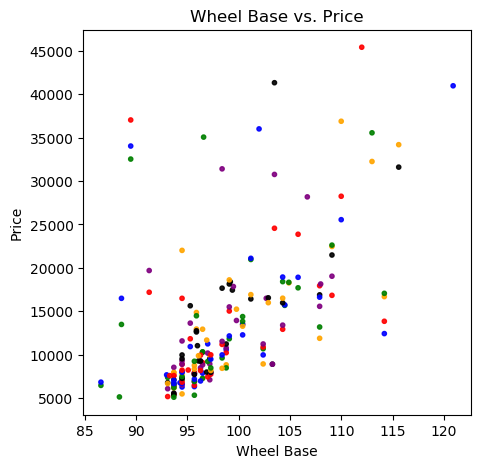

Inference: There are clearly some outliers for wheel base and it has some what higher correlation with price.
 Also the data is not linear which will impact the linearity assumptions
 Lets remove the outliers blow 5% and check for further analysis


In [60]:
# Scatter Plot
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "wheelbase", "price", 'Wheel Base', 'Price', 5, 5, 0, 'Wheel Base vs. Price', colors, 0.9)

print('Inference: There are clearly some outliers for wheel base and it has some what higher correlation with price.\n',
      'Also the data is not linear which will impact the linearity assumptions\n',
      'Lets remove the outliers blow 5% and check for further analysis')

#### Removing outliers in wheel base

In [61]:
master_frame = master_frame[master_frame.wheelbase >= master_frame.wheelbase.quantile(.05)]
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 2 to 204
Data columns (total 24 columns):
symboling           194 non-null int64
aspiration          194 non-null object
doornumber          194 non-null object
carbody             194 non-null object
drivewheel          194 non-null object
enginelocation      194 non-null object
wheelbase           194 non-null float64
carlength           194 non-null float64
carwidth            194 non-null float64
carheight           194 non-null float64
curbweight          194 non-null int64
enginetype          194 non-null object
cylindernumber      194 non-null object
enginesize          194 non-null int64
fuelsystem          194 non-null object
boreratio           194 non-null float64
stroke              194 non-null float64
compressionratio    194 non-null float64
horsepower          194 non-null int64
peakrpm             194 non-null int64
citympg             194 non-null int64
highwaympg          194 non-null int64
price          

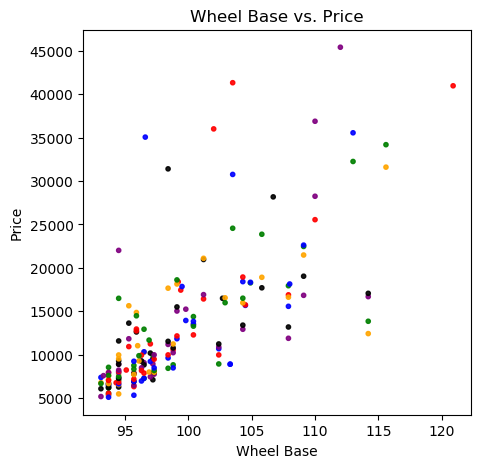

We got a decent linear data lets proceed...


In [62]:
draw_scatter_plot(master_frame, "wheelbase", "price", 'Wheel Base', 'Price', 5, 5, 0, 'Wheel Base vs. Price', colors, 0.9)
print('We got a decent linear data lets proceed...')

#### Visualise carlength vs price
* Length of car (Numeric)

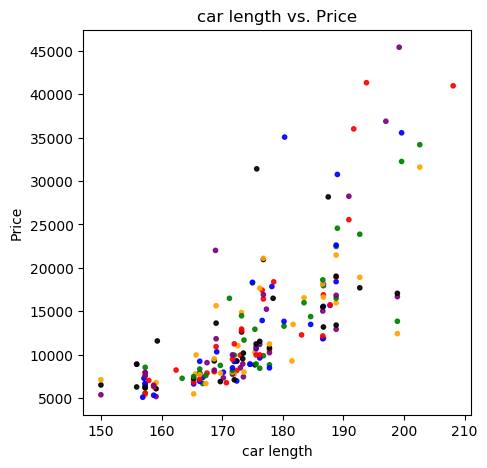

Inference: car length and prices are some what highly correlated and as length increases price is also increasing.
 This will be retained for further analysis


In [63]:
# Scatter Plot
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "carlength", "price", 'car length', 'Price', 5, 5, 0, 'car length vs. Price', colors, 0.9)

print('Inference: car length and prices are some what highly correlated and as length increases price is also increasing.\n',
      'This will be retained for further analysis')

#### Visualise carwidth vs price
* Width of car (Numeric)

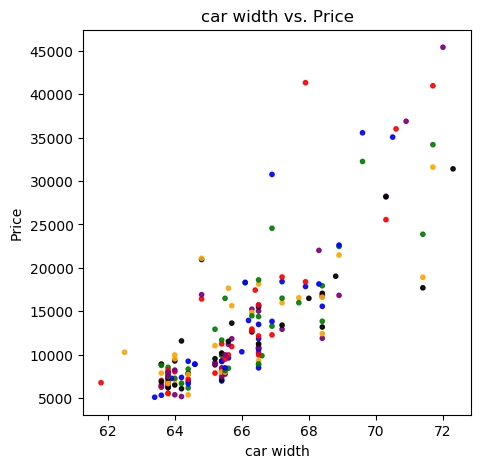

Inference: car width and prices are some what highly correlated and as width increases price is also increasing.
 This will be retained for further analysis


In [64]:
# Scatter Plot 
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "carwidth", "price", 'car width', 'Price', 5, 5, 0, 'car width vs. Price', colors, 0.9)

print('Inference: car width and prices are some what highly correlated and as width increases price is also increasing.\n',
      'This will be retained for further analysis')

#### Visualise carheight vs price
* height of car (Numeric)		

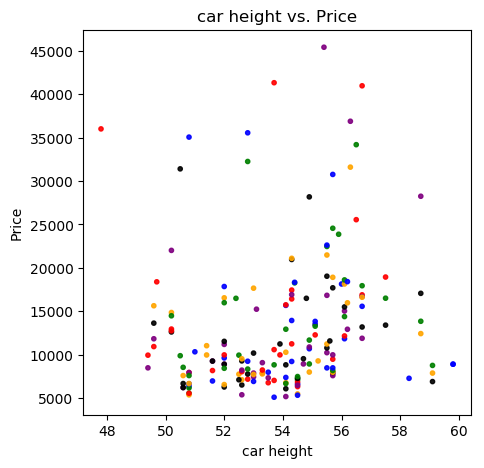

Inference: car height and prices are not linear and no highly correlated.
 As per the linearity assumption, This will be removed from further analysis


In [65]:
# Scatter Plot 
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "carheight", "price", 'car height', 'Price', 5, 5, 0, 'car height vs. Price', colors, 0.9)

print('Inference: car height and prices are not linear and no highly correlated.\n',
      'As per the linearity assumption, This will be removed from further analysis')

In [66]:
try:
    print('Dropping carheight column', '...')
    master_frame.drop('carheight', axis=1, inplace=True)
except:
    print('\tColumn already dropped...')

Dropping carheight column ...


#### Visualise curbweight vs price
* The weight of a car without occupants or baggage. (Numeric)		

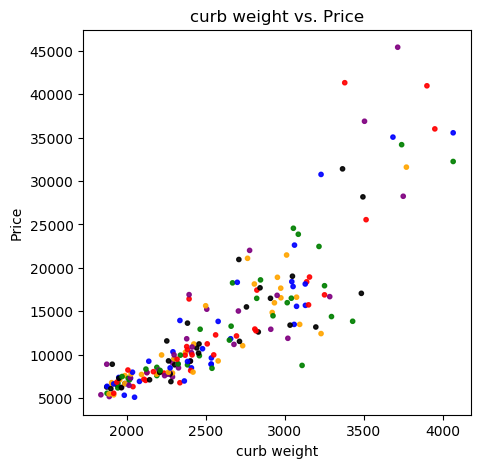

Inference: curbweight and prices are highly positively correlated.
 This will be retained for further analysis


In [67]:
# Scatter Plot
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "curbweight", "price", 'curb weight', 'Price', 5, 5, 0, 'curb weight vs. Price', colors, 0.9)

print('Inference: curbweight and prices are highly positively correlated.\n',
      'This will be retained for further analysis')

#### Visualise enginetype vs price
* Type of engine. (Categorical)		

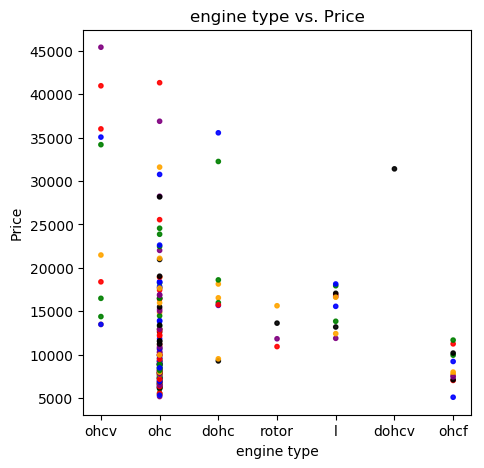

Inference: There is significance variation on price ranges for all seven engine types.
 This will be retained for further analysis.


In [68]:
# Scatter Plot
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "enginetype", "price", 'engine type', 'Price', 5, 5, 0, 'engine type vs. Price', colors, 0.9)

print('Inference: There is significance variation on price ranges for all seven engine types.\n',
      'This will be retained for further analysis.')

#### Visualise cylindernumber vs price
* cylinder placed in the car (Categorical)		

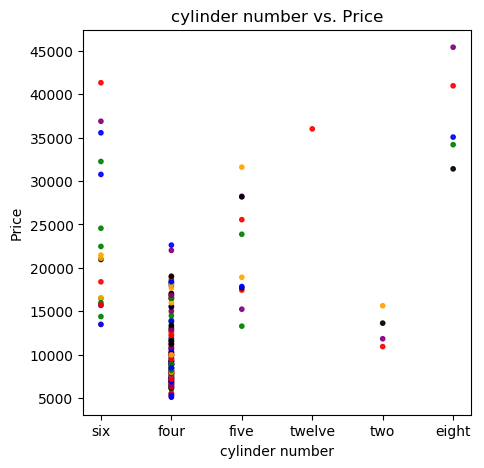

Inference: There is significance variation on price ranges for all seven types of cylinder numbers.
 This will be retained for further analysis.


In [69]:
# Scatter Plot (symboling vs price)
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "cylindernumber", "price", 'cylinder number', 'Price',
                  5, 5, 0, 'cylinder number vs. Price', colors, 0.9)

print('Inference: There is significance variation on price ranges for all seven types of cylinder numbers.\n',
      'This will be retained for further analysis.')

#### Visualise enginesize vs price
* Size of car (Numeric)		

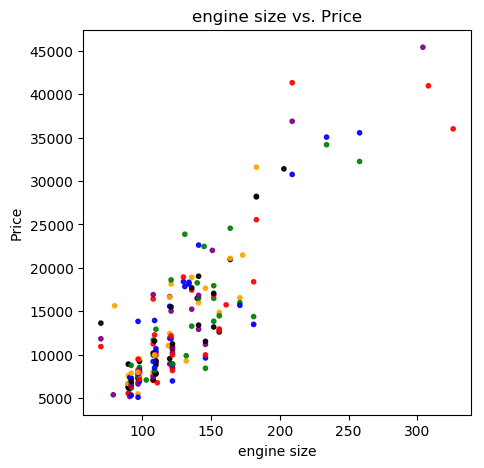

Inference: There is a high correlation between engine size and price.
 There are some outliers in the engine size which will be removed for further analysis.


In [70]:
# Scatter Plot
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "enginesize", "price", 'engine size', 'Price', 5, 5, 0, 'engine size vs. Price', colors, 0.9)

print('Inference: There is a high correlation between engine size and price.\n',
      'There are some outliers in the engine size which will be removed for further analysis.')

#### Removing outliers in engine size

In [71]:
master_frame = master_frame[master_frame.enginesize >= master_frame.enginesize.quantile(.05)]
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 2 to 204
Data columns (total 23 columns):
symboling           189 non-null int64
aspiration          189 non-null object
doornumber          189 non-null object
carbody             189 non-null object
drivewheel          189 non-null object
enginelocation      189 non-null object
wheelbase           189 non-null float64
carlength           189 non-null float64
carwidth            189 non-null float64
curbweight          189 non-null int64
enginetype          189 non-null object
cylindernumber      189 non-null object
enginesize          189 non-null int64
fuelsystem          189 non-null object
boreratio           189 non-null float64
stroke              189 non-null float64
compressionratio    189 non-null float64
horsepower          189 non-null int64
peakrpm             189 non-null int64
citympg             189 non-null int64
highwaympg          189 non-null int64
price               189 non-null float64
CompanyName    

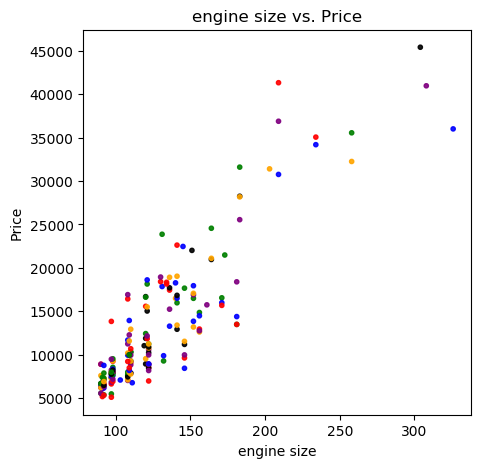

In [72]:
draw_scatter_plot(master_frame, "enginesize", "price", 'engine size', 'Price', 5, 5, 0, 'engine size vs. Price', colors, 0.9)

#### Visualise fuelsystem vs price
* Fuel system of car (Categorical)		

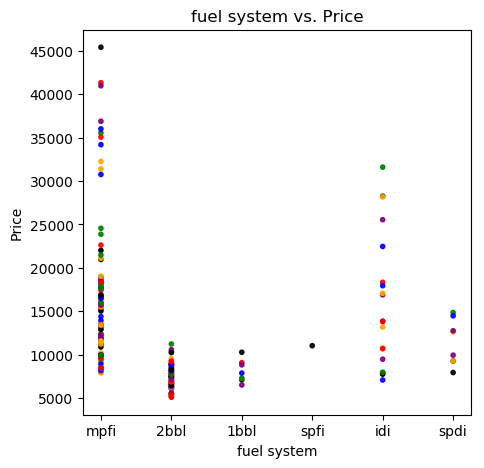

Inference: There is significance variation on price ranges for all eight types of fuel systems.
 This will be retained for further analysis.


In [73]:
# Scatter Plot
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "fuelsystem", "price", 'fuel system', 'Price', 5, 5, 0, 'fuel system vs. Price', colors, 0.9)

print('Inference: There is significance variation on price ranges for all eight types of fuel systems.\n',
      'This will be retained for further analysis.')

#### Visualise boreratio vs price
* Boreratio of car (Numeric)		

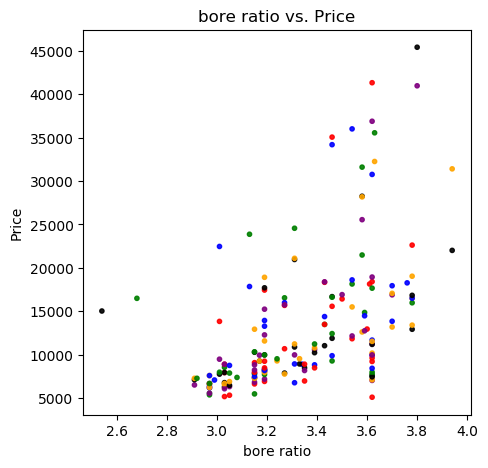

Inference: There is high correlation between bore ratio and price.
 There are some outliers in bore ration this will be removed for further analysis.


In [74]:
# Scatter Plot
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "boreratio", "price", 'bore ratio', 'Price', 5, 5, 0, 'bore ratio vs. Price', colors, 0.9)

print('Inference: There is high correlation between bore ratio and price.\n',
      'There are some outliers in bore ration this will be removed for further analysis.')

#### Removing outliers in bore ration

In [75]:
master_frame = master_frame[master_frame.boreratio >= master_frame.boreratio.quantile(.05)]
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 3 to 204
Data columns (total 23 columns):
symboling           183 non-null int64
aspiration          183 non-null object
doornumber          183 non-null object
carbody             183 non-null object
drivewheel          183 non-null object
enginelocation      183 non-null object
wheelbase           183 non-null float64
carlength           183 non-null float64
carwidth            183 non-null float64
curbweight          183 non-null int64
enginetype          183 non-null object
cylindernumber      183 non-null object
enginesize          183 non-null int64
fuelsystem          183 non-null object
boreratio           183 non-null float64
stroke              183 non-null float64
compressionratio    183 non-null float64
horsepower          183 non-null int64
peakrpm             183 non-null int64
citympg             183 non-null int64
highwaympg          183 non-null int64
price               183 non-null float64
CompanyName    

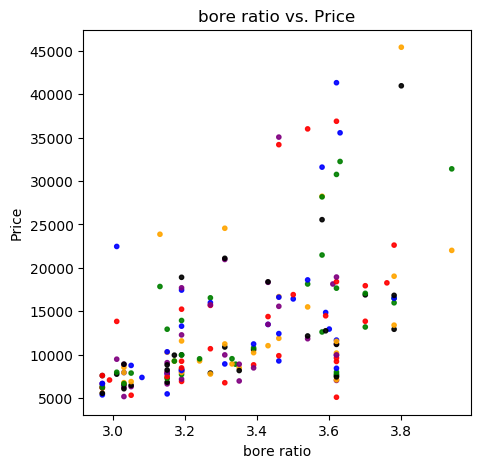

In [76]:
draw_scatter_plot(master_frame, "boreratio", "price", 'bore ratio', 'Price', 5, 5, 0, 'bore ratio vs. Price', colors, 0.9)

#### Visualise stroke vs price
* Stroke or volume inside the engine (Numeric)		

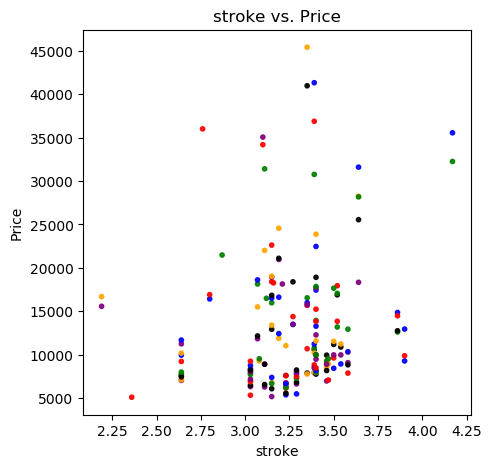

Inference: Even though most preferred stroke in the give populaiton is 3 and 3.5
 The Stroke is not showing a Linear reation this wil be removd from further analysis


In [77]:
# Scatter Plot
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "stroke", "price", 'stroke', 'Price', 5, 5, 0, 'stroke vs. Price', colors, 0.9)

print('Inference: Even though most preferred stroke in the give populaiton is 3 and 3.5\n', 
      'The Stroke is not showing a Linear reation this wil be removd from further analysis')

In [78]:
try:
    print('Dropping stroke column', '...')
    master_frame.drop('stroke', axis=1, inplace=True)
except:
    print('\tColumn already dropped...')

Dropping stroke column ...


#### Visualise compressionratio vs price
* compression ratio of car (Numeric)		

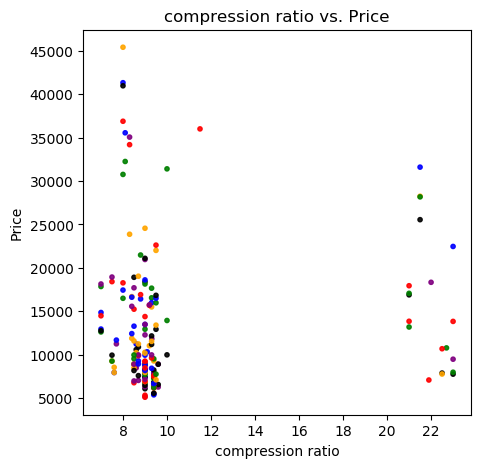

Inference: Compression ratio shows a very low correlation and price varies from low to high for both.
 This will be removed from further analysis.


In [79]:
# Scatter Plot
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "compressionratio", "price", 'compression ratio', 'Price', 5, 5, 0,
                  'compression ratio vs. Price', colors, 0.9)

print('Inference: Compression ratio shows a very low correlation and price varies from low to high for both.\n',
      'This will be removed from further analysis.')

In [80]:
try:
    print('Dropping compressionratio column', '...')
    master_frame.drop('compressionratio', axis=1, inplace=True)
except:
    print('\tColumn already dropped...')

Dropping compressionratio column ...


#### Visualise horsepower vs price
* Horsepower (Numeric)		

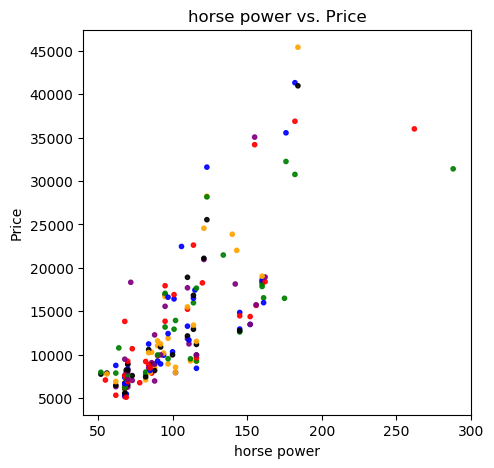

Inference: There is high correlation between horse power and price.
 This will be retained for further analysis.


In [81]:
# Scatter Plot
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "horsepower", "price", 'horse power', 'Price', 5, 5, 0, 'horse power vs. Price', colors, 0.9)

print('Inference: There is high correlation between horse power and price.\n',
      'This will be retained for further analysis.')

#### Visualise peakrpm vs price
* car peak rpm (Numeric)		

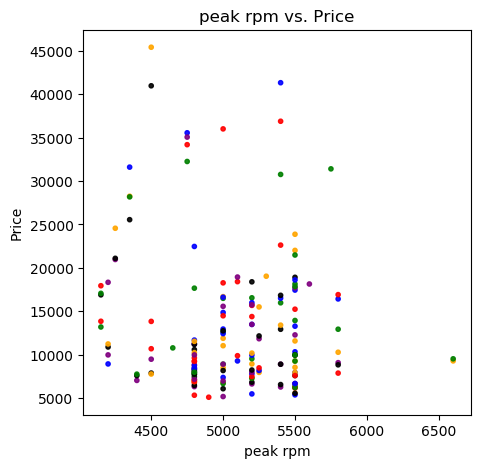

Inference: The peak rpm at 4500 is highly priced.
 This does not have good correlation with price so this will be dropped.


In [82]:
# Scatter Plot
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "peakrpm", "price", 'peak rpm', 'Price', 5, 5, 0, 'peak rpm vs. Price', colors, 0.9)

print('Inference: The peak rpm at 4500 is highly priced.\n',
      'This does not have good correlation with price so this will be dropped.')

In [83]:
try:
    print('Dropping peakrpm column', '...')
    master_frame.drop('peakrpm', axis=1, inplace=True)
except:
    print('\tColumn already dropped...')

Dropping peakrpm column ...


#### Visualise citympg vs price
* Mileage in city (Numeric)		

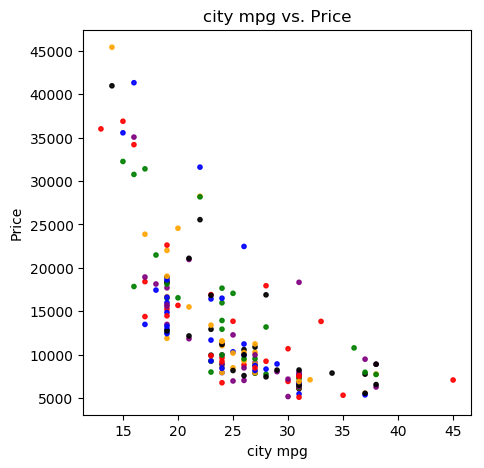

Inference: Lower the mileage higher the price, so these are highly negatively correlated.
 This will be retained for further analysis.


In [84]:
# Scatter Plot
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "citympg", "price", 'city mpg', 'Price', 5, 5, 0, 'city mpg vs. Price', colors, 0.9)

print('Inference: Lower the mileage higher the price, so these are highly negatively correlated.\n',
      'This will be retained for further analysis.')

#### Visualise highwaympg vs price
* Mileage on highway (Numeric)	

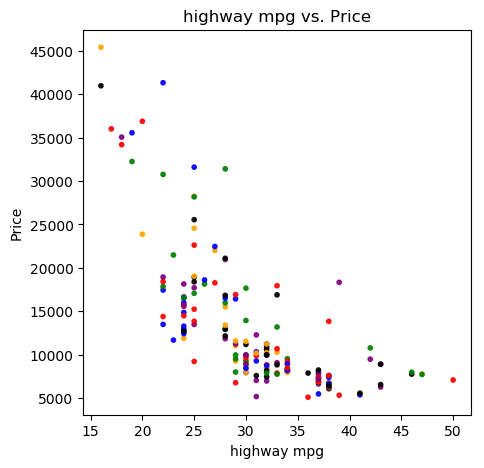

Inference: Lower the mileage higher the price, so these are highly negatively correlated.
 This will be retained for further analysis.


In [85]:
# Scatter Plot
colors = ('green', 'blue', 'red', 'purple', 'black', 'orange')
draw_scatter_plot(master_frame, "highwaympg", "price", 'highway mpg', 'Price', 5, 5, 0, 'highway mpg vs. Price', colors, 0.9)

print('Inference: Lower the mileage higher the price, so these are highly negatively correlated.\n',
      'This will be retained for further analysis.')

## Data Preparation

## Create Dummy Variables by converting catagorical data to numerical variables

#### From the data dictionary, and from the data types we know that following list of columns are catagorical variables, so first convert them to dummies.
* symboling
* fueltype		
* aspiration		
* doornumber		
* carbody		
* drivewheel		
* enginelocation		
* enginetype		
* cylindernumber		
* fuelsystem	
* carCompany		

#### Creating dummy variables for symboling

In [86]:
columnName = 'symboling'
master_frame = create_dummy_variable(columnName, master_frame, col_to_remove_forDummy[columnName])
master_frame.head(1)

[ 2  1  0 -1  3 -2]
   symboling_-2  symboling_-1  symboling_0  symboling_1  symboling_2  \
3             0             0            0            0            1   
4             0             0            0            0            1   
5             0             0            0            0            1   
6             0             0            0            1            0   
7             0             0            0            1            0   

   symboling_3  
3            0  
4            0  
5            0  
6            0  
7            0  
dropping  -2
dropping  symboling
droped both variables


,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,...,horsepower,citympg,highwaympg,price,CompanyName,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
3,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,...,102,24,30,13950.0,AUDI,0,0,0,1,0


#### Creating dummy variables for aspiration

In [87]:
columnName = 'aspiration'
master_frame = create_dummy_variable(columnName, master_frame, col_to_remove_forDummy[columnName])
master_frame.head(1)

['std' 'turbo']
   aspiration_std  aspiration_turbo
3               1                 0
4               1                 0
5               1                 0
6               1                 0
7               1                 0
dropping  turbo
dropping  aspiration
droped both variables


,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,...,citympg,highwaympg,price,CompanyName,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,aspiration_std
3,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,...,24,30,13950.0,AUDI,0,0,0,1,0,1


#### Creating dummy variables for doornumber

In [88]:
columnName = 'doornumber'
master_frame = create_dummy_variable(columnName, master_frame, col_to_remove_forDummy[columnName])
master_frame.head(1)

['four' 'two']
   doornumber_four  doornumber_two
3                1               0
4                1               0
5                0               1
6                1               0
7                1               0
dropping  two
dropping  doornumber
droped both variables


,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,...,highwaympg,price,CompanyName,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,aspiration_std,doornumber_four
3,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,...,30,13950.0,AUDI,0,0,0,1,0,1,1


#### Creating dummy variables for carbody

In [89]:
columnName = 'carbody'
master_frame = create_dummy_variable(columnName, master_frame, col_to_remove_forDummy[columnName])
master_frame.head(1)

['sedan' 'wagon' 'hatchback' 'hardtop' 'convertible']
   carbody_convertible  carbody_hardtop  carbody_hatchback  carbody_sedan  \
3                    0                0                  0              1   
4                    0                0                  0              1   
5                    0                0                  0              1   
6                    0                0                  0              1   
7                    0                0                  0              0   

   carbody_wagon  
3              0  
4              0  
5              0  
6              0  
7              1  
dropping  convertible
dropping  carbody
droped both variables


,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,...,symboling_0,symboling_1,symboling_2,symboling_3,aspiration_std,doornumber_four,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
3,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,...,0,0,1,0,1,1,0,0,1,0


#### Creating dummy variables for drivewheel

In [90]:
columnName = 'drivewheel'
master_frame = create_dummy_variable(columnName, master_frame, col_to_remove_forDummy[columnName])
master_frame.head(1)

['fwd' '4wd' 'rwd']
   drivewheel_4wd  drivewheel_fwd  drivewheel_rwd
3               0               1               0
4               1               0               0
5               0               1               0
6               0               1               0
7               0               1               0
dropping  4wd
dropping  drivewheel
droped both variables


,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,...,symboling_2,symboling_3,aspiration_std,doornumber_four,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
3,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,...,1,0,1,1,0,0,1,0,1,0


#### Creating dummy variables for enginelocation

In [91]:
columnName = 'enginelocation'
master_frame = create_dummy_variable(columnName, master_frame, 'front')
master_frame.head(1)

['front']
   enginelocation_front
3                     1
4                     1
5                     1
6                     1
7                     1
dropping  front
dropping  enginelocation
droped both variables


,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,...,symboling_2,symboling_3,aspiration_std,doornumber_four,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
3,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,...,1,0,1,1,0,0,1,0,1,0


#### Creating dummy variables for enginetype

In [92]:
columnName = 'enginetype'
master_frame = create_dummy_variable(columnName, master_frame, col_to_remove_forDummy[columnName])
master_frame.head(1)

['ohc' 'dohc' 'ohcv' 'l' 'dohcv' 'ohcf']
   enginetype_dohc  enginetype_dohcv  enginetype_l  enginetype_ohc  \
3                0                 0             0               1   
4                0                 0             0               1   
5                0                 0             0               1   
6                0                 0             0               1   
7                0                 0             0               1   

   enginetype_ohcf  enginetype_ohcv  
3                0                0  
4                0                0  
5                0                0  
6                0                0  
7                0                0  
dropping  dohcv
dropping  enginetype
droped both variables


,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,...,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv
3,99.8,176.6,66.2,2337,four,109,mpfi,3.19,102,24,...,0,1,0,1,0,0,0,1,0,0


#### Creating dummy variables for cylindernumber

In [93]:
columnName = 'cylindernumber'
col_to_remove_forDummy[columnName] = 'twelve'
master_frame = create_dummy_variable(columnName, master_frame, col_to_remove_forDummy[columnName])
master_frame.head(1)

['four' 'five' 'six' 'twelve' 'eight']
   cylindernumber_eight  cylindernumber_five  cylindernumber_four  \
3                     0                    0                    1   
4                     0                    1                    0   
5                     0                    1                    0   
6                     0                    1                    0   
7                     0                    1                    0   

   cylindernumber_six  cylindernumber_twelve  
3                   0                      0  
4                   0                      0  
5                   0                      0  
6                   0                      0  
7                   0                      0  
dropping  twelve
dropping  cylindernumber
droped both variables


,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,...,drivewheel_rwd,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six
3,99.8,176.6,66.2,2337,109,mpfi,3.19,102,24,30,...,0,0,0,1,0,0,0,0,1,0


#### Creating dummy variables for fuelsystem

In [94]:
columnName = 'fuelsystem'
master_frame = create_dummy_variable(columnName, master_frame, col_to_remove_forDummy[columnName])
master_frame.head(1)

['mpfi' '2bbl' '1bbl' 'spfi' 'idi' 'spdi']
   fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_idi  fuelsystem_mpfi  \
3                0                0               0                1   
4                0                0               0                1   
5                0                0               0                1   
6                0                0               0                1   
7                0                0               0                1   

   fuelsystem_spdi  fuelsystem_spfi  
3                0                0  
4                0                0  
5                0                0  
6                0                0  
7                0                0  
dropping  spfi
dropping  fuelsystem
droped both variables


,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,1,0,0,0,0,1,0


#### Check if any coumns is left to be converted to dummies by checking the types

In [95]:
print('Remaining column(s) whose type is object,', master_frame.select_dtypes(include=['object']).columns.values)

Remaining column(s) whose type is object, ['CompanyName']


#### Only CompanyName is of type object, Create dummy variable for CompanyName

In [96]:
columnName = 'CompanyName'
master_frame = create_dummy_variable(columnName, master_frame, col_to_remove_forDummy[columnName])
master_frame.head(1)

['AUDI' 'BMW' 'CHEVROLET' 'DODGE' 'HONDA' 'ISUZU' 'JAGUAR' 'MAZDA' 'BUICK'
 'MERCURY' 'MITSUBISHI' 'NISSAN' 'PEUGEOT' 'PLYMOUTH' 'PORSCHE' 'RENAULT'
 'SAAB' 'SUBARU' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO']
   CompanyName_AUDI  CompanyName_BMW  CompanyName_BUICK  \
3                 1                0                  0   
4                 1                0                  0   
5                 1                0                  0   
6                 1                0                  0   
7                 1                0                  0   

   CompanyName_CHEVROLET  CompanyName_DODGE  CompanyName_HONDA  \
3                      0                  0                  0   
4                      0                  0                  0   
5                      0                  0                  0   
6                      0                  0                  0   
7                      0                  0                  0   

   CompanyName_ISUZU  CompanyName_JAGUAR  CompanyNa

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,CompanyName_NISSAN,CompanyName_PEUGEOT,CompanyName_PLYMOUTH,CompanyName_PORSCHE,CompanyName_RENAULT,CompanyName_SAAB,CompanyName_SUBARU,CompanyName_TOYOTA,CompanyName_VOLKSWAGEN,CompanyName_VOLVO
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,0,0,0,0,0,0,0


## Derive new variables for Car Performance

#### Derive Combined MPG (miles per gallon) values from highway mpg and city mpg

Fuel Economy (Combined MPG)
    * The Combined MPG value is the most prominent for the purpose of quick and easy comparison across vehicles. 
    * Some form of the miles per gallon metric has been on vehicle labels since 1977. 
    * Combined fuel economy is a weighted average of City and Highway MPG values that is calculated by weighting the City value by 55% and the Highway value by 45%.
* ref: https://www.fueleconomy.gov/feg/label/learn-more-gasoline-label.shtml

In [97]:
master_frame['CombinedMPG'] = round((master_frame.citympg * 0.55) + (master_frame.highwaympg * 0.45), 2)
master_frame.CombinedMPG[0:10]

3     26.70
4     19.80
5     21.70
6     21.70
7     21.70
8     18.35
9     18.70
10    25.70
11    25.70
12    24.15
Name: CombinedMPG, dtype: float64

## Rescaling the Features 
It is extremely important to rescale the variables so that they have a comparable scale, 
using Normalisation (min-max scaling)

In [98]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
master_frame = master_frame.apply(normalize) 

#### Lets see how our data set looks like, after all the above operations

In [99]:
master_frame.head(5)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,CompanyName_PEUGEOT,CompanyName_PLYMOUTH,CompanyName_PORSCHE,CompanyName_RENAULT,CompanyName_SAAB,CompanyName_SUBARU,CompanyName_TOYOTA,CompanyName_VOLKSWAGEN,CompanyName_VOLVO,CombinedMPG
3,0.241007,0.396552,0.419048,0.211223,0.080508,0.226804,0.211864,0.34375,0.411765,0.219254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.366718
4,0.226619,0.396552,0.438095,0.433394,0.194915,0.226804,0.266949,0.15625,0.176471,0.306142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154083
5,0.241007,0.409962,0.428571,0.288777,0.194915,0.226804,0.245763,0.18750,0.264706,0.251527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212635
6,0.456835,0.704981,0.914286,0.442518,0.194915,0.226804,0.245763,0.18750,0.264706,0.312596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212635
7,0.456835,0.704981,0.914286,0.492701,0.194915,0.226804,0.245763,0.18750,0.264706,0.342634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212635


In [100]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 3 to 204
Data columns (total 58 columns):
wheelbase                 183 non-null float64
carlength                 183 non-null float64
carwidth                  183 non-null float64
curbweight                183 non-null float64
enginesize                183 non-null float64
boreratio                 183 non-null float64
horsepower                183 non-null float64
citympg                   183 non-null float64
highwaympg                183 non-null float64
price                     183 non-null float64
symboling_-1              183 non-null float64
symboling_0               183 non-null float64
symboling_1               183 non-null float64
symboling_2               183 non-null float64
symboling_3               183 non-null float64
aspiration_std            183 non-null float64
doornumber_four           183 non-null float64
carbody_hardtop           183 non-null float64
carbody_hatchback         183 non-null float64
ca

## Check the VIF first to understand any high multicollinearity in data

In [101]:
statsmodels_vif_cal(input_data=master_frame, dependent_col="price")

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Var,Vif
23,enginetype_l,inf
52,CompanyName_SUBARU,inf
47,CompanyName_PEUGEOT,inf
25,enginetype_ohcf,inf
56,CombinedMPG,4.326972e+06
7,citympg,1.185578e+06
8,highwaympg,1.108616e+06
29,cylindernumber_four,3.714500e+02
24,enginetype_ohc,3.383700e+02
4,enginesize,1.338100e+02


#### The VIF data showing infinity vals due to dvide by zero this due to the phenomena rsquared is 1 means our data set for these variabels has very less or only one entry lets check this

In [102]:
print(master_frame.groupby(master_frame.CompanyName_SUBARU).size())
print('SUBARU has 12 observations\n')

print(master_frame.groupby(master_frame.CompanyName_PEUGEOT).size())
print('PEUGEOT has 11 observations\n')

print(master_frame.groupby(master_frame.enginetype_ohcf).size())
print('enginetype_ohcf has 12 observations\n')

print(master_frame.groupby(master_frame.enginetype_l).size())
print('enginetype_l has 11 observations\n')

CompanyName_SUBARU
0.0    171
1.0     12
dtype: int64
SUBARU has 12 observations

CompanyName_PEUGEOT
0.0    172
1.0     11
dtype: int64
PEUGEOT has 11 observations

enginetype_ohcf
0.0    171
1.0     12
dtype: int64
enginetype_ohcf has 12 observations

enginetype_l
0.0    172
1.0     11
dtype: int64
enginetype_l has 11 observations



#### Lets check if there is high correlation between engintyep_ohcf and SUBARU

In [103]:
master_frame['enginetype_ohcf'].corr(master_frame['CompanyName_SUBARU'])

1.0

#### The subaru and ohcf engine is highly correlated lets drop the brand subaru

In [104]:
colToDrop = 'CompanyName_SUBARU'
try:
    master_frame.drop([colToDrop], axis=1 , inplace=True)
except:
    print('Column already  dropped...')

#### Lets check if there is high correlation between engintyep_1 and PEUGEOT

In [105]:
master_frame['enginetype_l'].corr(master_frame['CompanyName_PEUGEOT'])

1.0

#### The PEUGEOT and l type engine is highly correlated lets drop the brand PEUGEOT

In [106]:
colToDrop = 'CompanyName_PEUGEOT'
try:
    master_frame.drop([colToDrop], axis=1 , inplace=True)
except:
    print('Column already  dropped...')

#### Now check the VIF for any high correlation

In [107]:
statsmodels_vif_cal(input_data=master_frame, dependent_col="price")

,Var,Vif
54,CombinedMPG,4326971.51
7,citympg,1185577.74
8,highwaympg,1108615.93
29,cylindernumber_four,371.45
24,enginetype_ohc,338.37
23,enginetype_l,161.17
25,enginetype_ohcf,141.27
4,enginesize,133.81
28,cylindernumber_five,114.49
30,cylindernumber_six,97.25


#### The citympg, highwaympg is highly correlated with CombinedMPG lets drop citympg and highwaympg

In [108]:
print('Dropping the following list of columns as we are considering only CombinedMPG')

column_list = ['citympg', 'highwaympg']

for column in column_list:
    print('Dropping', column, '...')
    try:
        master_frame.drop(column, axis=1, inplace=True)
    except:
        print('\tColumn already dropped...')
        continue

Dropping the following list of columns as we are considering only CombinedMPG
Dropping citympg ...
Dropping highwaympg ...


#### Now check the VIF for any high correlation

In [109]:
statsmodels_vif_cal(input_data=master_frame, dependent_col="price")

,Var,Vif
27,cylindernumber_four,1715.94
22,enginetype_ohc,929.53
4,enginesize,232.38
5,boreratio,163.03
32,fuelsystem_mpfi,142.88
3,curbweight,129.45
1,carlength,104.90
21,enginetype_l,103.58
26,cylindernumber_five,102.95
30,fuelsystem_2bbl,102.20


## Lets start the training

## Split Dataset into Training and Test data sets

In [110]:
# Putting feature variable to X
X = master_frame.drop(['price'], axis=1)

# Putting response variable to y
y = master_frame['price']

In [111]:
#random_state is the seed used by the random number generator, it can be any integer.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

## Rrecursive feature elimination (RFE) with output number of variable equal to 21

In [112]:
# Running RFE with the output number of the variable equal to 21
lm = LinearRegression()
rfe = RFE(lm, 21)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ True  True  True  True  True  True  True False False False False False
 False False  True  True  True  True False False  True False  True  True
 False False False  True False False False False False False  True  True
  True False False False False False False False False False  True False
  True False False  True False]
[ 1  1  1  1  1  1  1  6  2  3  4  5 26 28  1  1  1  1 31 30  1 16  1  1
 21 17 12  1 11  8 27 25 32 29  1  1  1 14 24  9  7 20 13 23 15 22  1 19
  1 18 10  1 33]


In [113]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohc', 'enginetype_ohc',
       'enginetype_ohcf', 'cylindernumber_four', 'CompanyName_AUDI',
       'CompanyName_BMW', 'CompanyName_BUICK', 'CompanyName_PORSCHE',
       'CompanyName_SAAB', 'CompanyName_VOLVO'],
      dtype='object')

### Create new data sets with the rfe returned columns for training and derived dataframes

In [114]:
# Create train data set with only rfe retrurned columns
X_train_rfe = X_train[col] # Creating X_test dataframe with RFE selected variables
X_train_rfe = sm.add_constant(X_train_rfe) # Adding a constant variable to x train rfe

# create data frame with price and rfe retrurned columns
CarPriceRFEdf = master_frame['price']
CarPriceRFEdf = pd.concat([CarPriceRFEdf,master_frame[col]],axis=1)
CarPriceRFEdf.head(1)

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,carbody_hardtop,carbody_hatchback,...,enginetype_dohc,enginetype_ohc,enginetype_ohcf,cylindernumber_four,CompanyName_AUDI,CompanyName_BMW,CompanyName_BUICK,CompanyName_PORSCHE,CompanyName_SAAB,CompanyName_VOLVO
3,0.219254,0.241007,0.396552,0.419048,0.211223,0.080508,0.226804,0.211864,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


### Create Frist fitted model

In [115]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.76e-62
Time:                        23:50:07   Log-Likelihood:                 221.49
No. Observations:                 128   AIC:                            -399.0
Df Residuals:                     106   BIC:                            -336.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0397    

### check for multicollinearity amongst variables,
* using variance inflation factor (VIF) and remove variables with high VIF and low significance (p>0.05).
* The variables with a high VIF or multicollinearity may be statistically significant or p<0.05, in which case you will first have to check for other insignificant variables (p>0.05) before removing the variables with a higher VIF and lower p-values.

In [116]:
statsmodels_vif_cal(input_data=CarPriceRFEdf, dependent_col="price")

,Var,Vif
1,carlength,60.16
2,carwidth,50.23
3,curbweight,38.46
14,cylindernumber_four,22.44
5,boreratio,21.29
9,carbody_sedan,20.55
0,wheelbase,19.84
6,horsepower,18.63
4,enginesize,17.72
12,enginetype_ohc,13.78


### carbody_sedan has p value > 0.05 so dropping this variable and updating the model

In [117]:
colToDrop = 'carbody_sedan'
try:
    X_train_rfe.drop([colToDrop], axis=1 , inplace=True)
    CarPriceRFEdf.drop([colToDrop], axis=1 , inplace=True)
except:
    print(colToDrop + ' already dropped...')

### Create 2nd fitted model

In [118]:
# Create a second fitted model
lm_2 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.08e-62
Time:                        23:50:07   Log-Likelihood:                 220.40
No. Observations:                 128   AIC:                            -398.8
Df Residuals:                     107   BIC:                            -338.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1245    

In [119]:
# Calculating Vif value
statsmodels_vif_cal(input_data=CarPriceRFEdf, dependent_col="price")

,Var,Vif
1,carlength,57.29
2,carwidth,50.05
3,curbweight,38.33
0,wheelbase,19.27
6,horsepower,18.01
5,boreratio,17.96
4,enginesize,17.12
13,cylindernumber_four,15.47
11,enginetype_ohc,11.08
12,enginetype_ohcf,2.53


#### carbody_hardtop has p value greater than 0.05, so dropping the variable and updating the model

In [120]:
colToDrop = 'carbody_hardtop'
try:
    X_train_rfe.drop([colToDrop], axis=1 , inplace=True)
    CarPriceRFEdf.drop([colToDrop], axis=1 , inplace=True)
except:
    print(colToDrop + ' already dropped...')

### Create a 3rd fitted model

In [121]:
# Create a second fitted model
lm_3 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     118.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.43e-63
Time:                        23:50:07   Log-Likelihood:                 219.29
No. Observations:                 128   AIC:                            -398.6
Df Residuals:                     108   BIC:                            -341.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1278    

In [122]:
# Calculating Vif value
statsmodels_vif_cal(input_data=CarPriceRFEdf, dependent_col="price")

,Var,Vif
1,carlength,57.09
2,carwidth,50.02
3,curbweight,37.74
0,wheelbase,19.27
6,horsepower,18.01
4,enginesize,17.01
5,boreratio,16.86
12,cylindernumber_four,15.45
10,enginetype_ohc,10.96
11,enginetype_ohcf,2.49


#### horsepower has p value greater than 0.05 so dropping 'horsepower' and updating the Model¶

In [123]:
colToDrop = 'horsepower'
try:
    X_train_rfe.drop([colToDrop], axis=1 , inplace=True)
    CarPriceRFEdf.drop([colToDrop], axis=1 , inplace=True)
except:
    print(colToDrop + ' already dropped...')

### Create 4th fitted model

In [124]:
# Create a second fitted model
lm_4 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     123.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           7.67e-64
Time:                        23:50:08   Log-Likelihood:                 217.77
No. Observations:                 128   AIC:                            -397.5
Df Residuals:                     109   BIC:                            -343.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1191    

In [125]:
# Calculating Vif value
statsmodels_vif_cal(input_data=CarPriceRFEdf, dependent_col="price")

,Var,Vif
1,carlength,56.79
2,carwidth,46.62
3,curbweight,35.09
0,wheelbase,17.09
5,boreratio,16.69
11,cylindernumber_four,15.42
4,enginesize,13.55
9,enginetype_ohc,10.96
10,enginetype_ohcf,2.48
14,CompanyName_BUICK,2.19


#### enginetype_ohc has p value greater than 0.05,  so dropping the variable and updating the model

In [126]:
colToDrop = 'enginetype_ohc'
try:
    X_train_rfe.drop([colToDrop], axis=1 , inplace=True)
    CarPriceRFEdf.drop([colToDrop], axis=1 , inplace=True)
except:
    print(colToDrop + ' already dropped...')

### Create 5th fitted model

In [127]:
# Create a second fitted model
lm_5 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     128.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.61e-64
Time:                        23:50:08   Log-Likelihood:                 216.15
No. Observations:                 128   AIC:                            -396.3
Df Residuals:                     110   BIC:                            -345.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0911    

In [128]:
# Calculating Vif value
statsmodels_vif_cal(input_data=CarPriceRFEdf, dependent_col="price")

,Var,Vif
1,carlength,55.59
2,carwidth,45.70
3,curbweight,34.90
5,boreratio,15.82
0,wheelbase,15.01
4,enginesize,13.30
10,cylindernumber_four,7.21
6,carbody_hatchback,2.08
9,enginetype_ohcf,2.02
13,CompanyName_BUICK,1.99


#### wheelbase has p value > 0.05, so dropping the variable and updating the model

In [129]:
colToDrop = 'wheelbase'
try:
    X_train_rfe.drop([colToDrop], axis=1 , inplace=True)
    CarPriceRFEdf.drop([colToDrop], axis=1 , inplace=True)
except:
    print(colToDrop + ' already dropped...')

### Create 6th fitted model

In [130]:
# Create a second fitted model
lm_6 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     134.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           7.96e-65
Time:                        23:50:08   Log-Likelihood:                 214.65
No. Observations:                 128   AIC:                            -395.3
Df Residuals:                     111   BIC:                            -346.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0987    

In [131]:
# Calculating Vif value
statsmodels_vif_cal(input_data=CarPriceRFEdf, dependent_col="price")

,Var,Vif
0,carlength,46.59
1,carwidth,44.06
2,curbweight,34.38
4,boreratio,15.53
3,enginesize,12.04
9,cylindernumber_four,6.39
5,carbody_hatchback,2.06
8,enginetype_ohcf,1.97
12,CompanyName_BUICK,1.97
13,CompanyName_PORSCHE,1.76


#### carbody_wagon has p value > 0.05 dropping this variable and updating the model 

In [132]:
colToDrop = 'carbody_wagon'
try:
    X_train_rfe.drop([colToDrop], axis=1 , inplace=True)
    CarPriceRFEdf.drop([colToDrop], axis=1 , inplace=True)
except:
    print(colToDrop + ' already dropped...')

### Create 7th fitted model

In [133]:
# Create a second fitted model
lm_7 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     140.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.44e-65
Time:                        23:50:09   Log-Likelihood:                 212.74
No. Observations:                 128   AIC:                            -393.5
Df Residuals:                     112   BIC:                            -347.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1064    

In [134]:
# Calculating Vif value
statsmodels_vif_cal(input_data=CarPriceRFEdf, dependent_col="price")

,Var,Vif
0,carlength,42.11
1,carwidth,39.30
2,curbweight,31.83
4,boreratio,15.04
3,enginesize,11.57
8,cylindernumber_four,6.26
5,carbody_hatchback,2.06
11,CompanyName_BUICK,1.96
7,enginetype_ohcf,1.83
12,CompanyName_PORSCHE,1.69


### Check the Correlation matrix

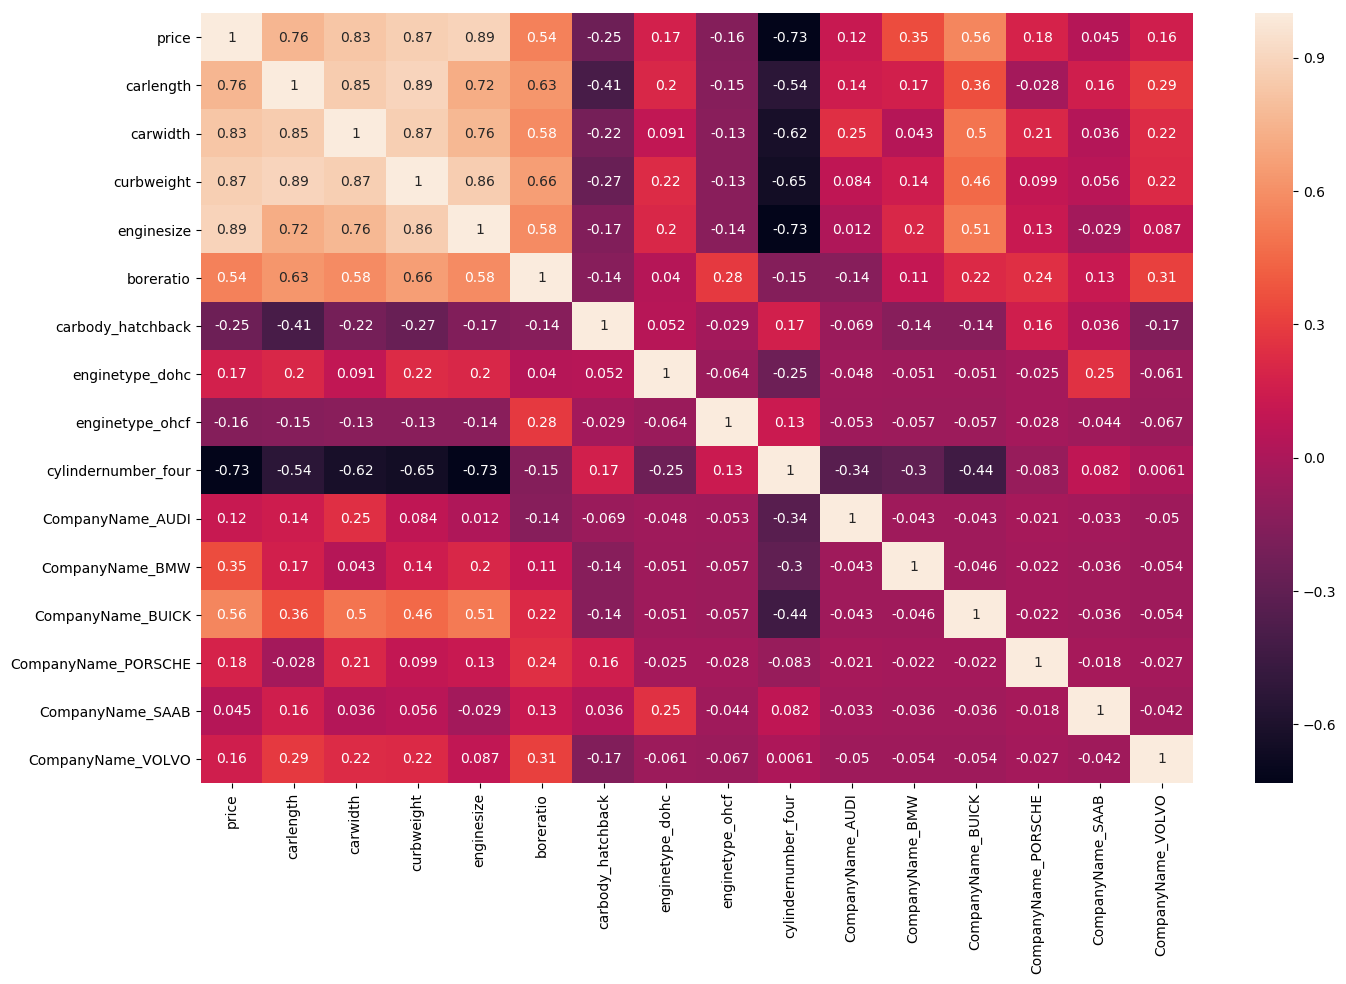

In [135]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(CarPriceRFEdf.corr(),annot = True)
plt.show()

#### carlength is highly correlted with curbweight so dropping the variable and updating the model

In [136]:
colToDrop = 'carlength'
try:
    X_train_rfe.drop([colToDrop], axis=1 , inplace=True)
    CarPriceRFEdf.drop([colToDrop], axis=1 , inplace=True)
except:
    print(colToDrop + ' already dropped...')

### Create 8th fitted model

In [137]:
# Create a second fitted model
lm_8 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     142.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.80e-65
Time:                        23:50:10   Log-Likelihood:                 209.08
No. Observations:                 128   AIC:                            -388.2
Df Residuals:                     113   BIC:                            -345.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1081    

In [138]:
# Calculating Vif value
statsmodels_vif_cal(input_data=CarPriceRFEdf, dependent_col="price")

,Var,Vif
0,carwidth,26.01
1,curbweight,25.85
3,boreratio,14.22
2,enginesize,11.36
7,cylindernumber_four,6.17
10,CompanyName_BUICK,1.91
6,enginetype_ohcf,1.74
4,carbody_hatchback,1.65
8,CompanyName_AUDI,1.64
13,CompanyName_VOLVO,1.50


#### carbody_hatchback has p value greater than 0.05 so dropping the variable and updating the model

In [139]:
colToDrop = 'carbody_hatchback'
try:
    X_train_rfe.drop([colToDrop], axis=1 , inplace=True)
    CarPriceRFEdf.drop([colToDrop], axis=1 , inplace=True)
except:
    print(colToDrop + ' already dropped...')

### Create 9th fitted model

In [140]:
# Create a second fitted model
lm_9 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     153.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.98e-66
Time:                        23:50:11   Log-Likelihood:                 208.49
No. Observations:                 128   AIC:                            -389.0
Df Residuals:                     114   BIC:                            -349.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1144    

In [141]:
# Calculating Vif value
statsmodels_vif_cal(input_data=CarPriceRFEdf, dependent_col="price")

,Var,Vif
0,carwidth,25.84
1,curbweight,25.02
3,boreratio,14.22
2,enginesize,11.03
6,cylindernumber_four,5.57
9,CompanyName_BUICK,1.90
5,enginetype_ohcf,1.74
7,CompanyName_AUDI,1.64
12,CompanyName_VOLVO,1.48
4,enginetype_dohc,1.39


#### carwidth has high VIF so dropping the variable and updating the model

In [142]:
colToDrop = 'carwidth'
try:
    X_train_rfe.drop([colToDrop], axis=1 , inplace=True)
    CarPriceRFEdf.drop([colToDrop], axis=1 , inplace=True)
except:
    print(colToDrop + ' already dropped...')

### Create 10th fitted model

In [143]:
# Create a second fitted model
lm_10 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     144.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.50e-63
Time:                        23:50:11   Log-Likelihood:                 199.30
No. Observations:                 128   AIC:                            -372.6
Df Residuals:                     115   BIC:                            -335.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0619    

In [144]:
# Calculating Vif value
statsmodels_vif_cal(input_data=CarPriceRFEdf, dependent_col="price")

,Var,Vif
0,curbweight,15.08
2,boreratio,14.05
1,enginesize,10.41
5,cylindernumber_four,3.11
4,enginetype_ohcf,1.73
8,CompanyName_BUICK,1.73
11,CompanyName_VOLVO,1.44
3,enginetype_dohc,1.38
10,CompanyName_SAAB,1.23
7,CompanyName_BMW,1.21


#### curbweight has p value greater than 0.05 so dropping the variable and updating the model

In [145]:
colToDrop = 'curbweight'
try:
    X_train_rfe.drop([colToDrop], axis=1 , inplace=True)
    CarPriceRFEdf.drop([colToDrop], axis=1 , inplace=True)
except:
    print(colToDrop + ' already dropped...')

### Create 11th fitted model

In [146]:
# Create a second fitted model
lm_11 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     104.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.07e-55
Time:                        23:50:11   Log-Likelihood:                 174.70
No. Observations:                 128   AIC:                            -325.4
Df Residuals:                     116   BIC:                            -291.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0286    

In [147]:
# Calculating Vif value
statsmodels_vif_cal(input_data=CarPriceRFEdf, dependent_col="price")

,Var,Vif
1,boreratio,11.64
0,enginesize,6.62
4,cylindernumber_four,3.00
7,CompanyName_BUICK,1.67
3,enginetype_ohcf,1.64
10,CompanyName_VOLVO,1.41
2,enginetype_dohc,1.31
9,CompanyName_SAAB,1.23
6,CompanyName_BMW,1.21
8,CompanyName_PORSCHE,1.19


#### boreratio has high VIF and p val so dropping the variable and updating the model

In [148]:
colToDrop = 'boreratio'
try:
    X_train_rfe.drop([colToDrop], axis=1 , inplace=True)
    CarPriceRFEdf.drop([colToDrop], axis=1 , inplace=True)
except:
    print(colToDrop + ' already dropped...')

### Create 12th fitted model

In [149]:
# Create a second fitted model
lm_12 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     116.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           7.31e-56
Time:                        23:50:12   Log-Likelihood:                 174.70
No. Observations:                 128   AIC:                            -327.4
Df Residuals:                     117   BIC:                            -296.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0275    

In [150]:
# Calculating Vif value
statsmodels_vif_cal(input_data=CarPriceRFEdf, dependent_col="price")

,Var,Vif
0,enginesize,2.58
6,CompanyName_BUICK,1.67
3,cylindernumber_four,1.44
1,enginetype_dohc,1.30
5,CompanyName_BMW,1.19
9,CompanyName_VOLVO,1.13
8,CompanyName_SAAB,1.13
2,enginetype_ohcf,1.10
7,CompanyName_PORSCHE,1.06
4,CompanyName_AUDI,1.05


#### enginetype_ohcf has p value greater than 0.05 so dropping the variable and updating the model

In [151]:
colToDrop = 'enginetype_ohcf'
try:
    X_train_rfe.drop([colToDrop], axis=1 , inplace=True)
    CarPriceRFEdf.drop([colToDrop], axis=1 , inplace=True)
except:
    print(colToDrop + ' already dropped...')

### Create 13th fitted model

In [152]:
# Create a second fitted model
lm_13 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     130.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.35e-57
Time:                        23:50:12   Log-Likelihood:                 174.68
No. Observations:                 128   AIC:                            -329.4
Df Residuals:                     118   BIC:                            -300.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0281    

In [153]:
# Calculating Vif value
statsmodels_vif_cal(input_data=CarPriceRFEdf, dependent_col="price")

,Var,Vif
0,enginesize,2.58
5,CompanyName_BUICK,1.67
2,cylindernumber_four,1.33
1,enginetype_dohc,1.30
4,CompanyName_BMW,1.19
8,CompanyName_VOLVO,1.12
7,CompanyName_SAAB,1.12
6,CompanyName_PORSCHE,1.06
3,CompanyName_AUDI,1.05


#### cylindernumber_four has p value greater than 0.05 and high VIF too so dropping the variable and updating the model

In [154]:
colToDrop = 'cylindernumber_four'
try:
    X_train_rfe.drop([colToDrop], axis=1 , inplace=True)
    CarPriceRFEdf.drop([colToDrop], axis=1 , inplace=True)
except:
    print(colToDrop + ' already dropped...')

### Create 14th fitted model

In [155]:
# Create a 14th fitted model
lm_14 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     147.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.51e-58
Time:                        23:50:12   Log-Likelihood:                 174.58
No. Observations:                 128   AIC:                            -331.2
Df Residuals:                     119   BIC:                            -305.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0409    

In [156]:
# Calculating Vif value
statsmodels_vif_cal(input_data=CarPriceRFEdf, dependent_col="price")

,Var,Vif
0,enginesize,2.14
4,CompanyName_BUICK,1.56
1,enginetype_dohc,1.28
3,CompanyName_BMW,1.18
7,CompanyName_VOLVO,1.11
6,CompanyName_SAAB,1.09
5,CompanyName_PORSCHE,1.06
2,CompanyName_AUDI,1.04


#### enginetype_dohc has p value greater than 0.05, so dropping the variable and updating the model

In [157]:
colToDrop = 'enginetype_dohc'
try:
    X_train_rfe.drop([colToDrop], axis=1 , inplace=True)
    CarPriceRFEdf.drop([colToDrop], axis=1 , inplace=True)
except:
    print(colToDrop + ' already dropped...')

### Create 15th fitted model

In [158]:
# Create a 15th fitted model
lm_15 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our second linear model
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     163.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.72e-58
Time:                        23:50:13   Log-Likelihood:                 172.55
No. Observations:                 128   AIC:                            -329.1
Df Residuals:                     120   BIC:                            -306.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0410    

In [159]:
# Calculating Vif value
statsmodels_vif_cal(input_data=CarPriceRFEdf, dependent_col="price")

,Var,Vif
0,enginesize,1.82
3,CompanyName_BUICK,1.47
2,CompanyName_BMW,1.15
6,CompanyName_VOLVO,1.10
4,CompanyName_PORSCHE,1.05
1,CompanyName_AUDI,1.04
5,CompanyName_SAAB,1.02


In [160]:
print('Inference:')
print('The Final Adjusted r square value and r square are similar 0.905 and 0.900 with very little difference.')
print('All variables VIF is very low and p value is much lesser than 0.05.')
print('Lets use this model for prediciton and check how accurate is this modal.')

Inference:
The Final Adjusted r square value and r square are similar 0.905 and 0.900 with very little difference.
All variables VIF is very low and p value is much lesser than 0.05.
Lets use this model for prediciton and check how accurate is this modal.


## Making predictions using lm15

In [161]:
CarPriceRFEdf.columns

Index(['price', 'enginesize', 'CompanyName_AUDI', 'CompanyName_BMW',
       'CompanyName_BUICK', 'CompanyName_PORSCHE', 'CompanyName_SAAB',
       'CompanyName_VOLVO'],
      dtype='object')

In [162]:
# Create test data set with only rfe retrurned columns
X_test_rfe = X_test[col] # Creating X_test dataframe by dropping variables from X_test
X_test_rfe = sm.add_constant(X_test_rfe) # Adding a constant variable to x test rfe

# Creating X_test_m13 dataframe by dropping variables from X_test_rfe
X_test_m15 = X_test_rfe[['const', 'enginesize', 'CompanyName_AUDI', 'CompanyName_BMW', 'CompanyName_BUICK', 'CompanyName_PORSCHE',
            'CompanyName_SAAB', 'CompanyName_VOLVO']]
X_test_m15.head(1)

,const,enginesize,CompanyName_AUDI,CompanyName_BMW,CompanyName_BUICK,CompanyName_PORSCHE,CompanyName_SAAB,CompanyName_VOLVO
14,1.0,0.313559,0.0,1.0,0.0,0.0,0.0,0.0


In [163]:
# Making predictions
y_pred_m15 = lm_15.predict(X_test_m15)

## Model Evaluation

Now let's check how well our model is able to make predictions.


#### Actual and Predicted

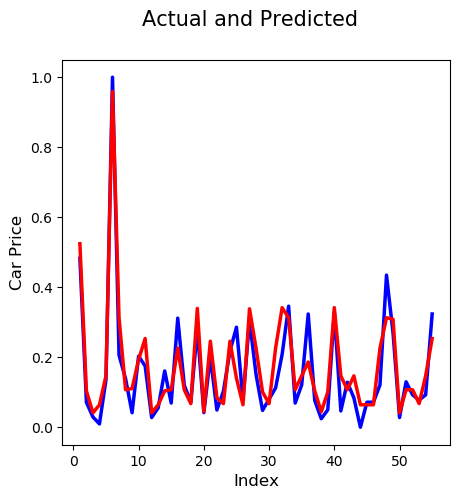

In [164]:

c = [i for i in range(1,56,1)] # generating index 

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
fig = plt.figure(figsize=(5,5))

plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")     # Plotting Actual
plt.plot(c, y_pred_m15, color="red",  linewidth=2.5, linestyle="-") # Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)                  # Plot heading 
plt.xlabel('Index', fontsize=12)                                   # X-label
plt.ylabel('Car Price', fontsize=12)                               # Y-label
plt.show()

In [165]:
print('Inference: The predicted price overlaps very well with the prices as shown in the above graph.')

Inference: The predicted price overlaps very well with the prices as shown in the above graph.


#### Plotting y_test and y_pred to understand the spread.

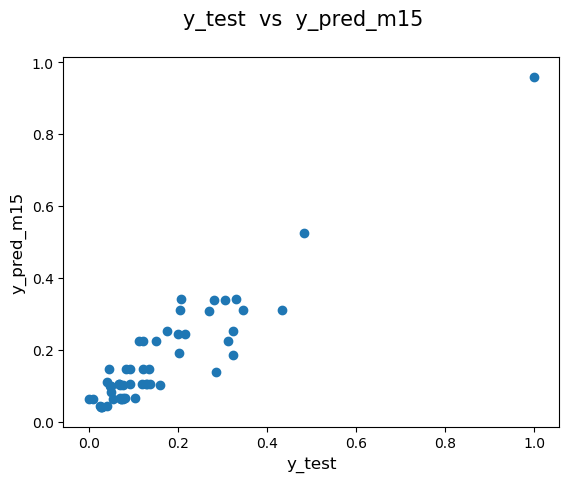

In [166]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m15)
fig.suptitle('y_test  vs  y_pred_m15', fontsize=15)              # Plot heading 
plt.xlabel('y_test', fontsize=12)                          # X-label
plt.ylabel('y_pred_m15', fontsize=12)                          # Y-label
plt.show()

In [167]:
print('Inference: All errors are white error as they are randomly distributed')

Inference: All errors are white error as they are randomly distributed


#### Error terms

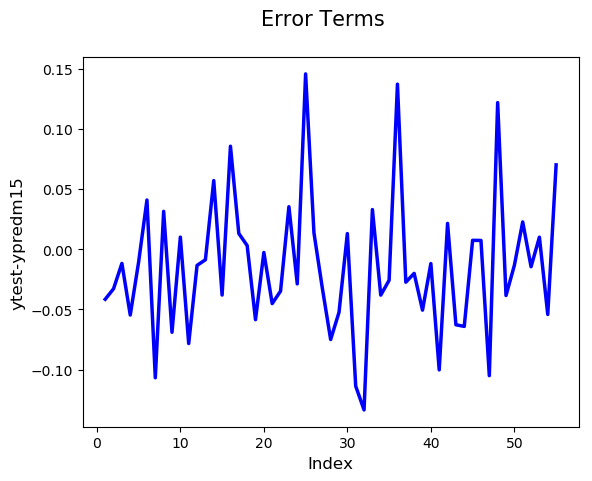

In [168]:
fig = plt.figure()
c = [i for i in range(1,56,1)]
plt.plot(c,y_test-y_pred_m15, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=12)                      # X-label
plt.ylabel('ytest-ypredm15', fontsize=12)                # Y-label
plt.show()

#### Plotting the error terms to understand the distribution.

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


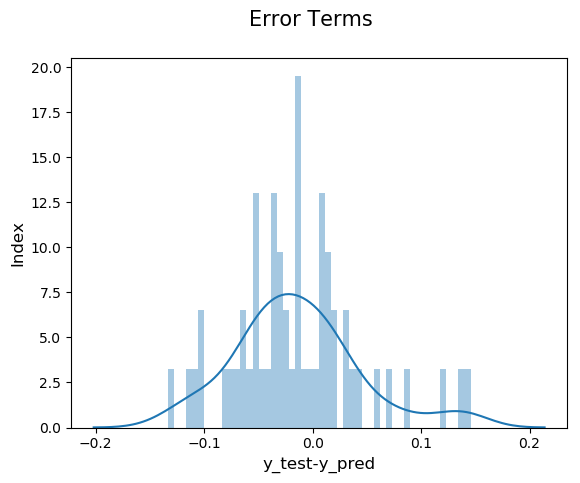

In [169]:
fig = plt.figure()
sns.distplot((y_test-y_pred_m15),bins=50)
fig.suptitle('Error Terms', fontsize=15)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=12)                  # X-label
plt.ylabel('Index', fontsize=12)                          # Y-label
plt.show()

### Check RMSE

The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

In [170]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m15)))

RMSE : 0.05952925741364948


In [171]:
print('Inference: RMSE is much lower...')

Inference: RMSE is much lower...


### Check Mean squared error

* The mean squared error (MSE) or mean squared deviation (MSD) of an estimator measures the average of the squares of the errors—that is, the average squared difference between the estimated values and what is estimated. 
* MSE is a risk function, corresponding to the expected value of the squared error loss. The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate.[1]

The MSE is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.

In [172]:
mse = mean_squared_error(y_test, y_pred_m15)
print('Mean_Squared_Error :' ,mse)

Mean_Squared_Error : 0.0035437324882205416


In [173]:
print('Inference: MSE(0.00354) is very much closer to zero...')

Inference: MSE(0.00354) is very much closer to zero...


### Check r square value

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data. 

In [174]:
r_squared = r2_score(y_test, y_pred_m15)
print('r_square_value :',r_squared)

r_square_value : 0.8618851633496969


In [175]:
print('Inference: The R square is a higher value of 86% and indicates that the model is fitting data much better.')

Inference: The R square is a higher value of 86% and indicates that the model is fitting data much better.


### Inferences

#### The model 15 contains only highly significant variables and very little multicollinearity because,

1. There are no redundent variables as there is no gap between the r square(0.905) and adj r square(0.900)
* Model is predicting pretty well as the graphs are over lapping very well.
* Lower values of RMSE(0.059) indicates a better fit
* Prediciton accuracy of model is good as RMSE value is much lower
* The quality of estimation is good as MSE very much closer to 0
* The model is fitting data very well as the r square value is more than 86%

##### Hence we can conclude that the model 15 predicts car price with enough accuracy, 

## Results and recommendations

#### The independent variables, which are significant in predicting the price of a car in US market is given below
1. Engine Size - The size of engine contributes very high in prcing as other factors like sizea and weight are affected with this.
2. CompanyName: AUDI, BMW, BUICK, PORSCHE, SAAB, VOLVO, falls under luxuary segment and the price incerases if the company is a luxuary brand.

#### Recommendations
* Geely Auto manufacturers can try for acquisition of any of the above brand or launch there models incollaboraiton with these brands if they are aiming for luxuary segment.
* Geeluy auto can reduce engine size to reduce price if they are aiming mid to low price segment.
